# 6. MODELADO Y EVALUACIÓN DE LOS ALGORITMOS

A continuación se desarrollaran distintos modelos de clasificación elegidos.

Destacar que se ejecutarán los siguientes modelos de clasificación binaria que se consideraron adecuados: Random Forest, Decision Trees, Reg Logística, KNN, XGBoost, Naive Bays.
SVM no fue ejecutado ya que no es óptimo para grandes sets de datos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path=r"C:\Users\Di.LAPTOP-OGJT2TAD\Documents\materias\maestria analitica de negocios\ciencia de datos aplicado a finanzas\df_limpio2.csv"

In [ ]:
#se trae df que se limpio generado anteriormente en "proyecto final parte 1"
df_limpio2 = pd.read_csv(path)

In [ ]:
pd.set_option("display.max_columns",None)
df_limpio2.head()

,Unnamed: 0,id,last_fico_range_high,last_pymnt_amnt,collection_recovery_fee,emp_length,annual_inc,grade,open_acc,num_rev_accts,purpose,loan_status2
0,1886203,2216459,589.0,375.49,116.5104,1,85000.0,0,12.0,14.0,2,0
1,1685114,100044718,569.0,659.43,0.0000,1,62681.0,1,10.0,10.0,2,0
2,1272353,16303051,664.0,200.70,7.6784,3,58000.0,1,5.0,7.0,2,0
3,754235,139967799,559.0,285.61,0.0000,1,137000.0,2,24.0,30.0,1,0
4,841617,137285483,569.0,591.02,0.0000,0,53000.0,4,13.0,4.0,4,0


In [ ]:
df_limpio2.columns

Index(['Unnamed: 0', 'id', 'last_fico_range_high', 'last_pymnt_amnt',
       'collection_recovery_fee', 'emp_length', 'annual_inc', 'grade',
       'open_acc', 'num_rev_accts', 'purpose', 'loan_status2'],
      dtype='object')

In [ ]:
df_limpio2.shape

(1972678, 12)

In [ ]:
#Se crean los vectores X y Y para los modelos.
X = df_limpio2.drop(['id','loan_status2','Unnamed: 0'], axis=1)
y = df_limpio2['loan_status2']

In [ ]:
#Se implementa la técnica de validación cruzada K-Fold para asegurar la estabilidad y calidad de los modelos
#Se generan 5 sub sets de datos de cada vector creado.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size=0.3,random_state=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, test_size=0.3,random_state=20)
X3_train, X3_test, y3_train, y3_test = train_test_split(X,y, test_size=0.3,random_state=30)
X4_train, X4_test, y4_train, y4_test = train_test_split(X,y, test_size=0.3,random_state=40)
X5_train, X5_test, y5_train, y5_test = train_test_split(X,y, test_size=0.3,random_state=50)

# Random Forest

#SET 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Modelo Random Forest con n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X1_train, y1_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_100 = rfc_100.predict(X1_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rfc_100.score(X1_train, y1_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rfc_100.score(X1_test, y1_test)))

Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.98


In [ ]:
print('F-1 Score : ',(f1_score(y1_test, y_pred_100, average='micro')))
print('Precision Score : ',(precision_score(y1_test, y_pred_100, average='micro')))
print('Recall Score : ',(recall_score(y1_test, y_pred_100, average='micro')))
print('Jaccard Score : ',(jaccard_score(y1_test, y_pred_100, average='micro')))

F-1 Score :  0.9803955363600111
Precision Score :  0.9803955363600111
Recall Score :  0.9803955363600111
Jaccard Score :  0.961544963092843


In [ ]:
print (classification_report(y1_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    324647
           1       1.00      0.96      0.98    267157

    accuracy                           0.98    591804
   macro avg       0.98      0.98      0.98    591804
weighted avg       0.98      0.98      0.98    591804



<Figure size 900x900 with 0 Axes>

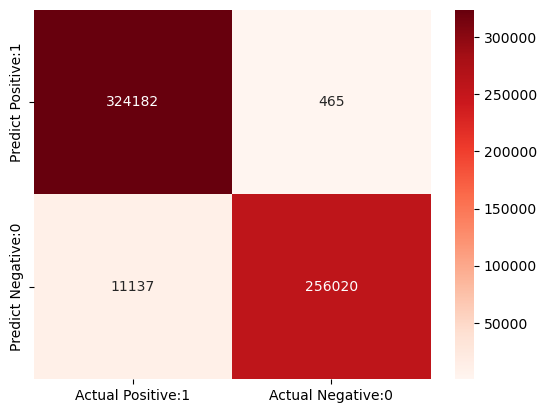

<Figure size 900x900 with 0 Axes>

In [ ]:
cm = confusion_matrix(y1_test, y_pred_100)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [ ]:
y_pred_prob = rfc_100.predict_proba(X1_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y1_test, y_pred_prob)

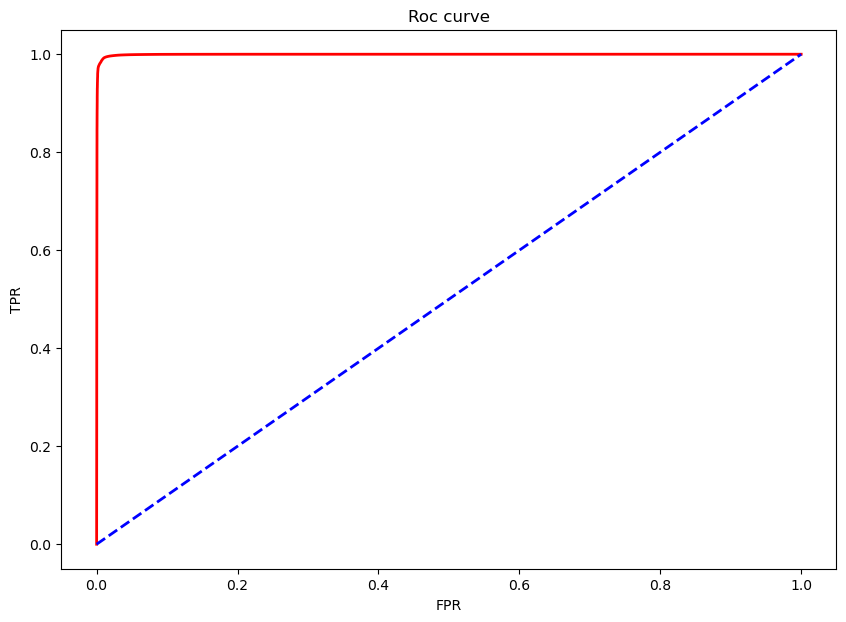

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Dados los resultados de la precisión se evidenció un sobreajuste en los datos, por lo cual el modelo no sería replicable ni óptimo para otros sets de datos, por lo cual no se realizaron las otras iteraciones con los demás subsets con este modelo.

# Decision Tree

Predicción con CLF Gini, ya que se ajusta mejor a datos continuos

#SET 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X1_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X1_train, y1_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X1_test, y1_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y1_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y1_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y1_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y1_test, y_pred_gini, average='micro')))

F-1 Score :  0.9009942480956533
Precision Score :  0.9009942480956533
Recall Score :  0.9009942480956533
Jaccard Score :  0.8198266902010467


In [ ]:
acc1=(accuracy_score(y1_test, y_pred_gini))
f1=(f1_score(y1_test, y_pred_gini, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y1_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324647
           1       0.88      0.90      0.89    267157

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

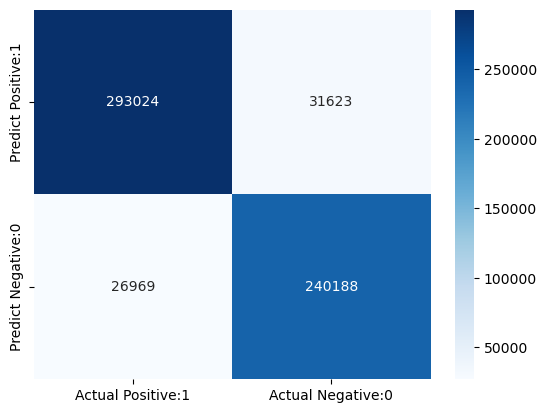

<Figure size 900x900 with 0 Axes>

In [ ]:
cm = confusion_matrix(y1_test, y_pred_gini)
cm_matrix22 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix22, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
y_pred_prob = clf_gini.predict_proba(X1_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y1_test, y_pred_prob)

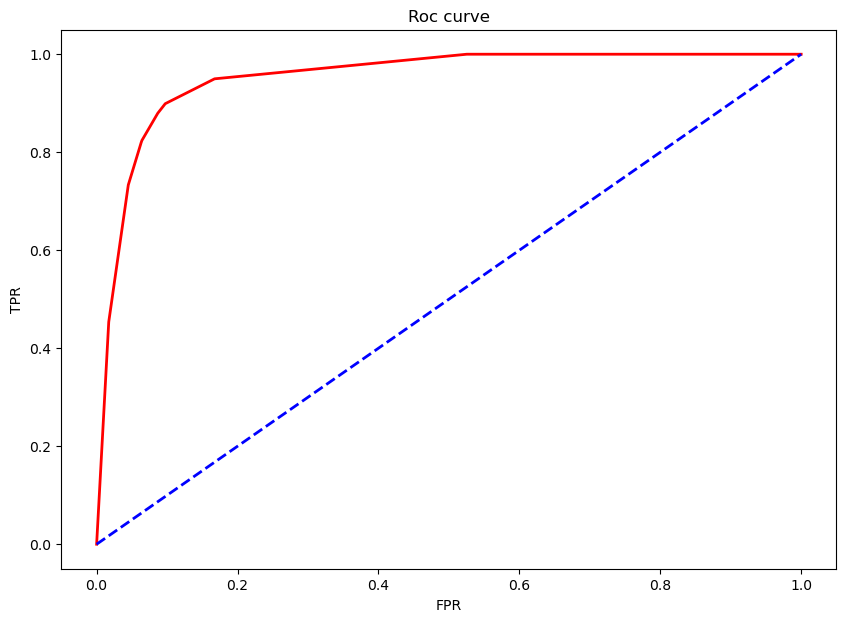

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X2_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X2_train, y2_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X2_test, y2_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y2_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y2_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y2_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y2_test, y_pred_gini, average='micro')))

F-1 Score :  0.9004400105440316
Precision Score :  0.9004400105440314
Recall Score :  0.9004400105440314
Jaccard Score :  0.8189093993766943


In [ ]:
acc2=(accuracy_score(y2_test, y_pred_gini))
f2=(f1_score(y2_test, y_pred_gini, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y2_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324688
           1       0.88      0.90      0.89    267116

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

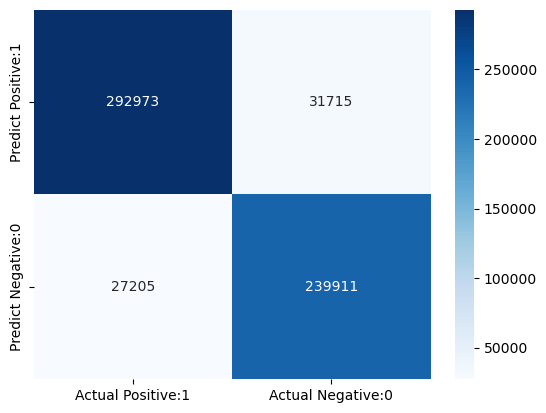

<Figure size 900x900 with 0 Axes>

In [ ]:
cm = confusion_matrix(y2_test, y_pred_gini)
cm_matrix23 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix23, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
y_pred_prob = clf_gini.predict_proba(X2_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y2_test, y_pred_prob)

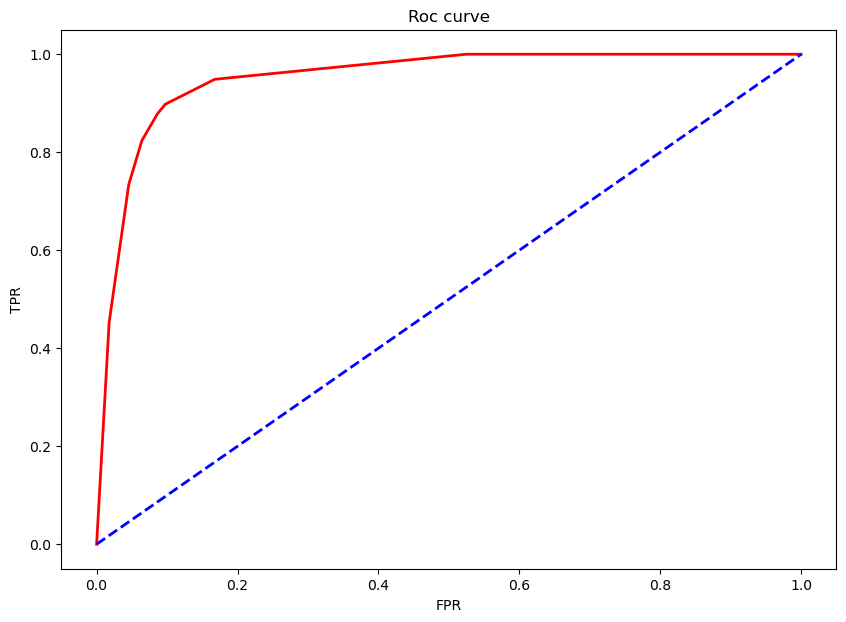

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X3_train, y3_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X3_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X3_train, y3_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X3_test, y3_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y3_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y3_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y3_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y3_test, y_pred_gini, average='micro')))

F-1 Score :  0.9010533892978081
Precision Score :  0.9010533892978081
Recall Score :  0.9010533892978081
Jaccard Score :  0.8199246264766799


In [ ]:
acc3=(accuracy_score(y3_test, y_pred_gini))
f3=(f1_score(y3_test, y_pred_gini, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y3_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324544
           1       0.88      0.90      0.89    267260

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

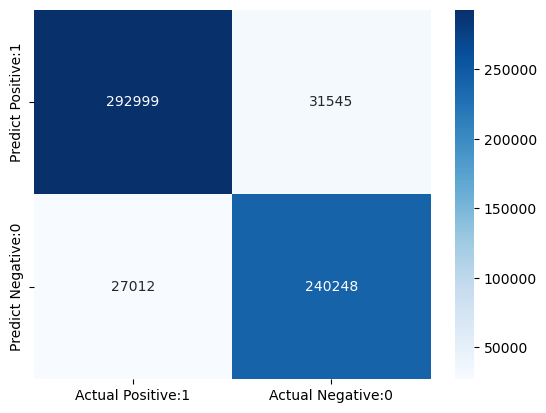

<Figure size 900x900 with 0 Axes>

In [ ]:
cm = confusion_matrix(y3_test, y_pred_gini)
cm_matrix24 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix24, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
y_pred_prob = clf_gini.predict_proba(X3_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y3_test, y_pred_prob)

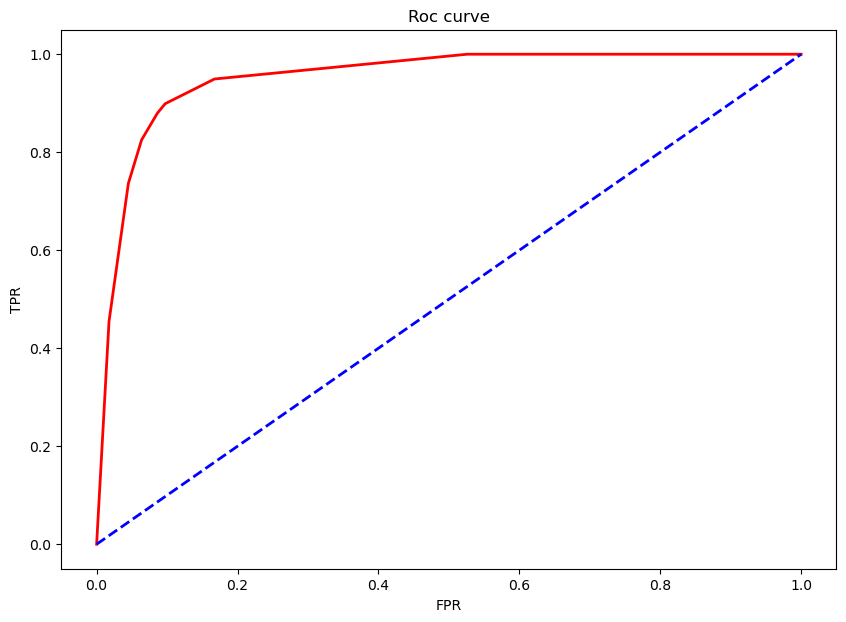

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 4

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X4_train, y4_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X4_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X4_train, y4_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X4_test, y4_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y4_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y4_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y4_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y4_test, y_pred_gini, average='micro')))

F-1 Score :  0.9013017823468581
Precision Score :  0.9013017823468581
Recall Score :  0.9013017823468581
Jaccard Score :  0.8203360739694932


In [ ]:
acc4=(accuracy_score(y4_test, y_pred_gini))
f4=(f1_score(y4_test, y_pred_gini, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y4_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324695
           1       0.88      0.90      0.89    267109

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

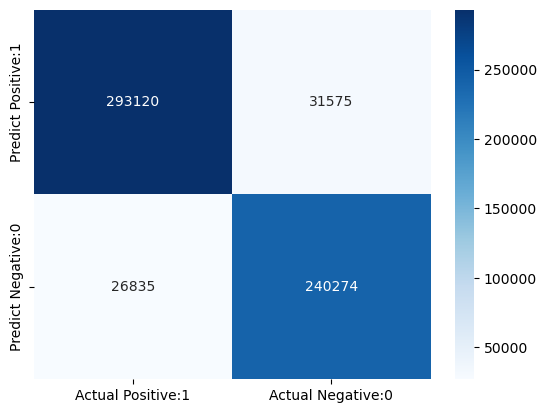

<Figure size 900x900 with 0 Axes>

In [ ]:
cm = confusion_matrix(y4_test, y_pred_gini)
cm_matrix25 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix25, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
y_pred_prob = clf_gini.predict_proba(X4_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y4_test, y_pred_prob)

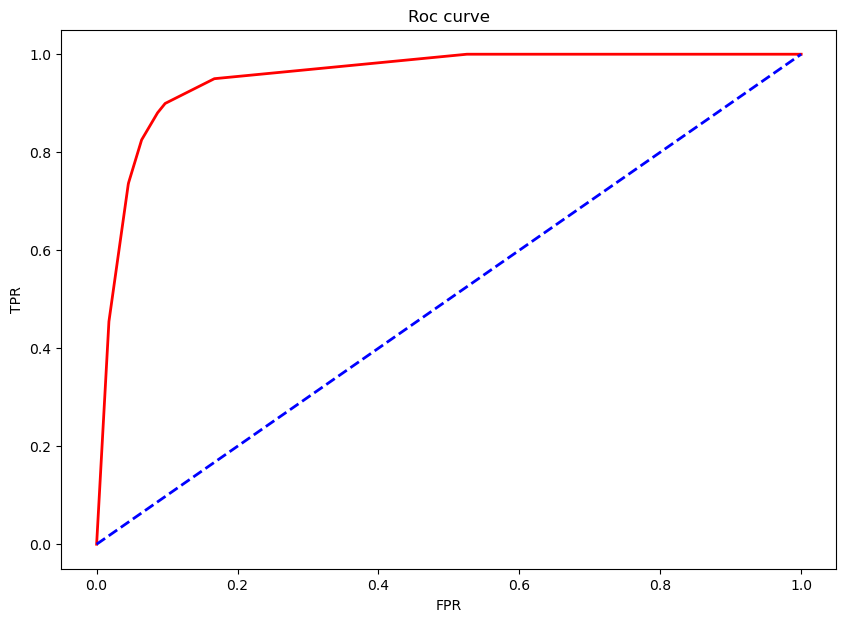

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X5_train, y5_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X5_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X5_train, y5_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X5_test, y5_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y5_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y5_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y5_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y5_test, y_pred_gini, average='micro')))

F-1 Score :  0.9007205088171084
Precision Score :  0.9007205088171084
Recall Score :  0.9007205088171084
Jaccard Score :  0.8193735224222898


In [ ]:
acc5=(accuracy_score(y5_test, y_pred_gini))
f5=(f1_score(y5_test, y_pred_gini, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y5_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324754
           1       0.88      0.90      0.89    267050

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

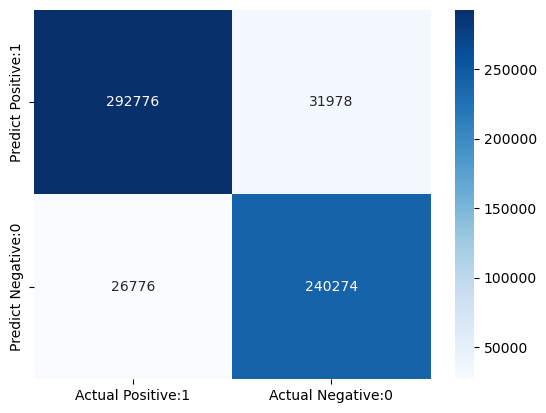

<Figure size 900x900 with 0 Axes>

In [ ]:
cm = confusion_matrix(y5_test, y_pred_gini)
cm_matrix26 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix26, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
y_pred_prob = clf_gini.predict_proba(X5_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y5_test, y_pred_prob)

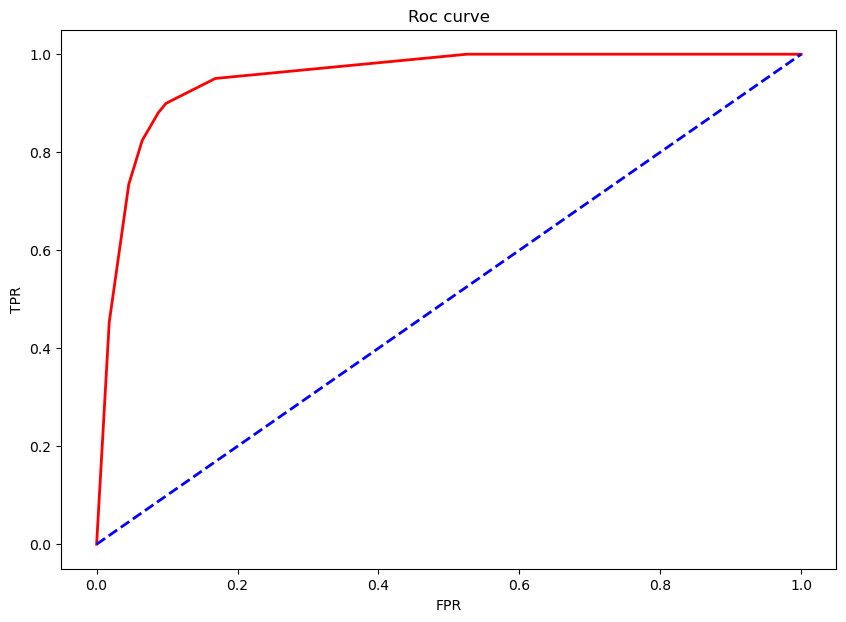

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
#Se calcula la precisión y el F1-score promedio para la ejecución de los 5 modelos con los 5 subsets de datos.
accuracy = [acc1, acc2, acc3, acc4, acc5]
acc_promedio1=np.mean(accuracy)

f= [f1, f2, f3, f4, f5]
f_prom1=np.mean(f)

print('Accuracy Promedio : ',acc_promedio1)
print('F1 Score Promedio : ',f_prom1)

Accuracy Promedio :  0.9009019878202918
F1 Score Promedio :  0.9009019878202918


In [ ]:
# Calcular la matriz promedio
matrices = [cm_matrix22, cm_matrix23, cm_matrix24, cm_matrix25, cm_matrix26]
matriz_promedio = np.mean(matrices, axis=0)

In [ ]:
#Se calcula la matriz de confusión promedio la ejecución de los 5 modelos con los 5 subsets de datos.
matriz_promedio5 = pd.DataFrame(data=matriz_promedio, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
matriz_promedio5

,Actual Positive:1,Actual Negative:0
Predict Positive:1,292978.4,31687.2
Predict Negative:0,26959.4,240179.0


# Regresión Logística

#SET 1

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X1_train, y1_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred1 = LR.predict(X1_test)
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X1_train, y1_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X1_test, y1_test)))

Precisión en el set de Entrenamiento: 0.75
Precisión en el set de Test: 0.75


In [ ]:
print('F-1 Score : ',(f1_score(y1_test, y_pred1, average='micro')))
print('Precision Score : ',(precision_score(y1_test, y_pred1, average='micro')))
print('Recall Score : ',(recall_score(y1_test, y_pred1, average='micro')))
print('Jaccard Score : ',(jaccard_score(y1_test, y_pred1, average='micro')))

F-1 Score :  0.7486177856182115
Precision Score :  0.7486177856182115
Recall Score :  0.7486177856182115
Jaccard Score :  0.5982327197993986


In [ ]:
acc6=(accuracy_score(y1_test, y_pred1))
f6=(f1_score(y1_test, y_pred1, average='micro'))

In [ ]:
print (classification_report(y1_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73    324647
           1       0.67      0.89      0.76    267157

    accuracy                           0.75    591804
   macro avg       0.77      0.76      0.75    591804
weighted avg       0.78      0.75      0.75    591804



<Figure size 900x900 with 0 Axes>

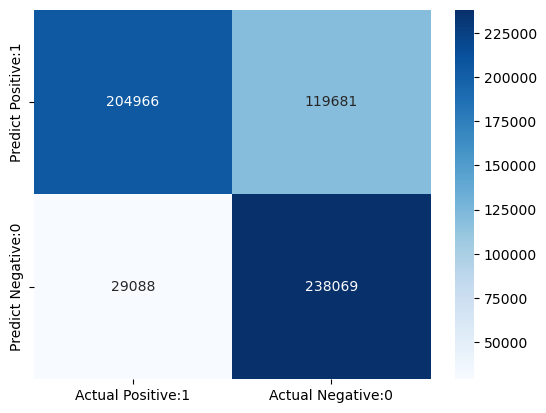

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y1_test, y_pred1)
cm_matrix1 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob1 = LR.predict_proba(X1_test) [:,1]
fpr, tpr, thresholds =roc_curve(y1_test, y_pred_prob1)

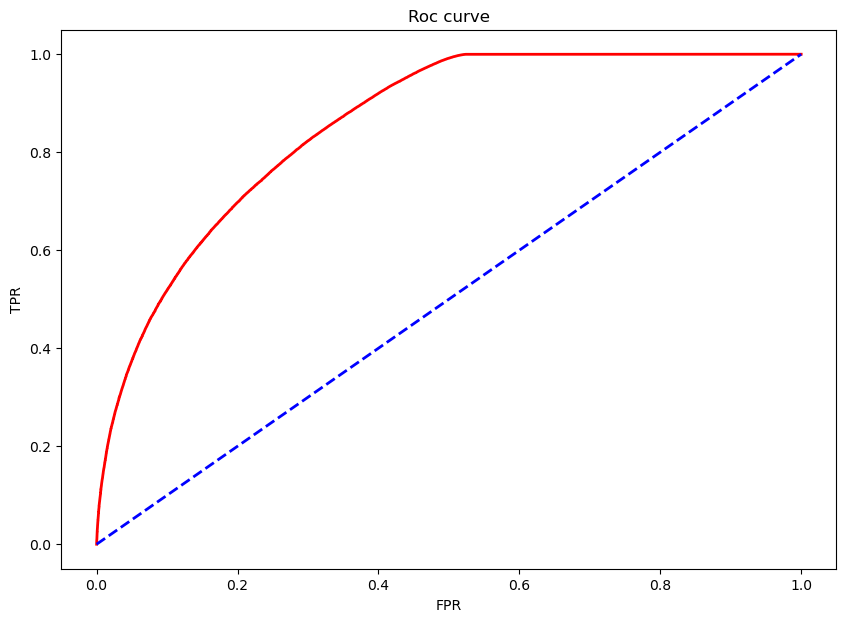

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
LR = LogisticRegression(random_state=0)
LR.fit(X1_train, y1_train)

LogisticRegression(random_state=0)

In [ ]:
# Esta es una regresión, por lo que tiene coeficientes

print('Intercept: ' + str(LR.intercept_))
print('Coefficients: ')
summary = pd.DataFrame([X1_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Intercept: [-0.00453829]
Coefficients: 


,Variable,Coefficient
0,last_fico_range_high,0.004107
4,annual_inc,-0.000005
1,last_pymnt_amnt,-0.00036
8,purpose,-0.014393
3,emp_length,-0.021532
5,grade,-0.027218
6,open_acc,-0.050778
7,num_rev_accts,-0.063748
2,collection_recovery_fee,-1.30132


#SET 2

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X2_train, y2_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred2 = LR.predict(X2_test)
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X2_train, y2_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X2_test, y2_test)))

Precisión en el set de Entrenamiento: 0.78
Precisión en el set de Test: 0.78


In [ ]:
print('F-1 Score : ',(f1_score(y2_test, y_pred2, average='micro')))
print('Precision Score : ',(precision_score(y2_test, y_pred2, average='micro')))
print('Recall Score : ',(recall_score(y2_test, y_pred2, average='micro')))
print('Jaccard Score : ',(jaccard_score(y2_test, y_pred2, average='micro')))

F-1 Score :  0.7796669167494643
Precision Score :  0.7796669167494643
Recall Score :  0.7796669167494643
Jaccard Score :  0.6388968122315487


In [ ]:
acc7=(accuracy_score(y2_test, y_pred2))
f7=(f1_score(y2_test, y_pred2, average='micro'))

In [ ]:
print (classification_report(y2_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78    324688
           1       0.71      0.87      0.78    267116

    accuracy                           0.78    591804
   macro avg       0.79      0.79      0.78    591804
weighted avg       0.80      0.78      0.78    591804



<Figure size 900x900 with 0 Axes>

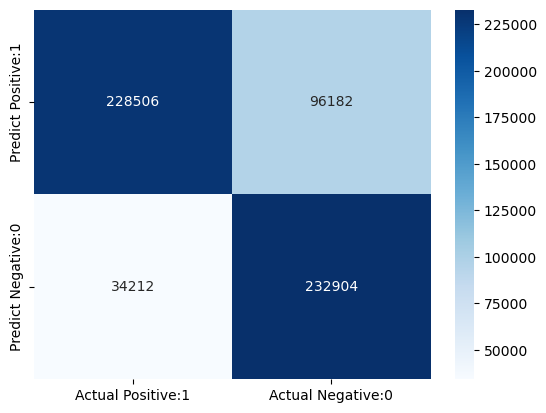

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y2_test, y_pred2)
cm_matrix2 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix2, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob2 = LR.predict_proba(X2_test) [:,1]
fpr, tpr, thresholds =roc_curve(y2_test, y_pred_prob2)

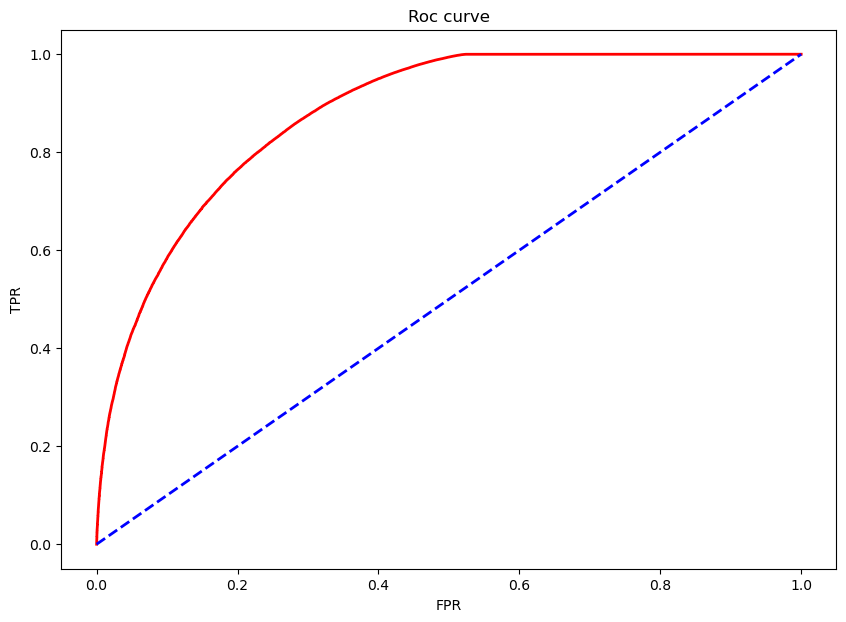

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
LR = LogisticRegression(random_state=0)
LR.fit(X2_train, y2_train)

LogisticRegression(random_state=0)

In [ ]:
# Esta es una regresión, por lo que tiene coeficientes

print('Intercept: ' + str(LR.intercept_))
print('Coefficients: ')
summary = pd.DataFrame([X2_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Intercept: [-0.03668842]
Coefficients: 


,Variable,Coefficient
0,last_fico_range_high,0.005807
4,annual_inc,-0.000006
1,last_pymnt_amnt,-0.00031
7,num_rev_accts,-0.022392
6,open_acc,-0.092048
8,purpose,-0.111622
3,emp_length,-0.144579
5,grade,-0.225726
2,collection_recovery_fee,-2.669279


#SET 3

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X3_train, y3_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred3 = LR.predict(X3_test)
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X3_train, y3_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X3_test, y3_test)))

Precisión en el set de Entrenamiento: 0.78
Precisión en el set de Test: 0.78


In [ ]:
print('F-1 Score : ',(f1_score(y3_test, y_pred3, average='micro')))
print('Precision Score : ',(precision_score(y3_test, y_pred3, average='micro')))
print('Recall Score : ',(recall_score(y3_test, y_pred3, average='micro')))
print('Jaccard Score : ',(jaccard_score(y3_test, y_pred3, average='micro')))

F-1 Score :  0.7780768632858176
Precision Score :  0.7780768632858176
Recall Score :  0.7780768632858176
Jaccard Score :  0.6367641629064399


In [ ]:
acc8=(accuracy_score(y3_test, y_pred3))
f8=(f1_score(y3_test, y_pred3, average='micro'))

In [ ]:
print (classification_report(y3_test, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78    324544
           1       0.71      0.87      0.78    267260

    accuracy                           0.78    591804
   macro avg       0.79      0.79      0.78    591804
weighted avg       0.80      0.78      0.78    591804



<Figure size 900x900 with 0 Axes>

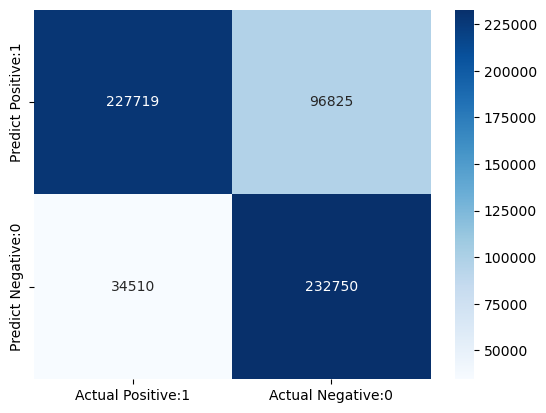

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y3_test, y_pred3)
cm_matrix3 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix3, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob3 = LR.predict_proba(X3_test) [:,1]
fpr, tpr, thresholds =roc_curve(y3_test, y_pred_prob3)

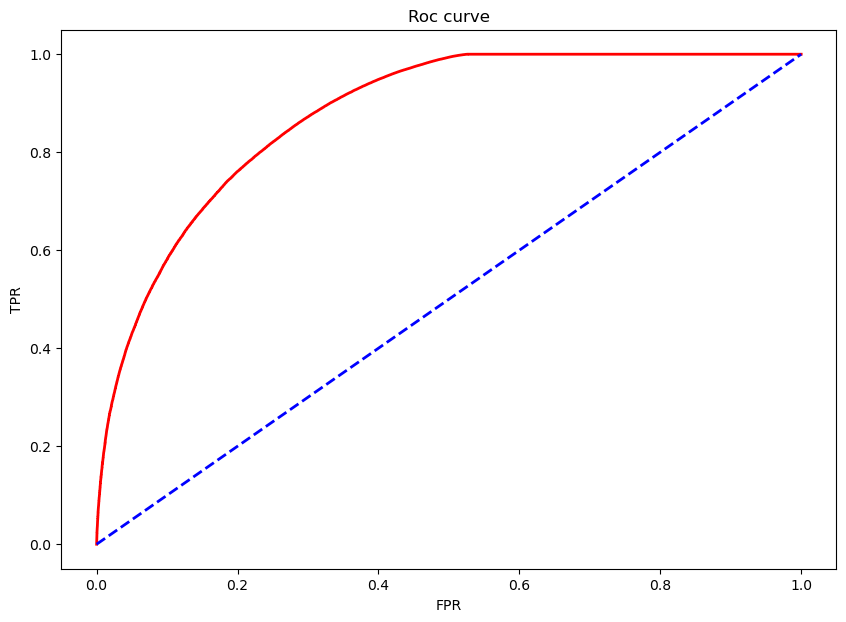

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
LR = LogisticRegression(random_state=0)
LR.fit(X3_train, y3_train)

LogisticRegression(random_state=0)

In [ ]:
# Esta es una regresión, por lo que tiene coeficientes

print('Intercept: ' + str(LR.intercept_))
print('Coefficients: ')
summary = pd.DataFrame([X3_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Intercept: [-0.03655694]
Coefficients: 


,Variable,Coefficient
0,last_fico_range_high,0.00583
4,annual_inc,-0.000006
1,last_pymnt_amnt,-0.000317
7,num_rev_accts,-0.023456
6,open_acc,-0.091438
8,purpose,-0.111582
3,emp_length,-0.145815
5,grade,-0.225222
2,collection_recovery_fee,-2.88004


#SET 4

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X4_train, y4_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred4 = LR.predict(X4_test)
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X4_train, y4_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X4_test, y4_test)))

Precisión en el set de Entrenamiento: 0.78
Precisión en el set de Test: 0.78


In [ ]:
print('F-1 Score : ',(f1_score(y4_test, y_pred4, average='micro')))
print('Precision Score : ',(precision_score(y4_test, y_pred4, average='micro')))
print('Recall Score : ',(recall_score(y4_test, y_pred4, average='micro')))
print('Jaccard Score : ',(jaccard_score(y4_test, y_pred4, average='micro')))

F-1 Score :  0.7790822637224486
Precision Score :  0.7790822637224486
Recall Score :  0.7790822637224486
Jaccard Score :  0.6381120042516442


In [ ]:
acc9=(accuracy_score(y4_test, y_pred4))
f9=(f1_score(y4_test, y_pred4, average='micro'))

In [ ]:
print (classification_report(y4_test, y_pred4))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78    324695
           1       0.71      0.87      0.78    267109

    accuracy                           0.78    591804
   macro avg       0.79      0.79      0.78    591804
weighted avg       0.80      0.78      0.78    591804



<Figure size 900x900 with 0 Axes>

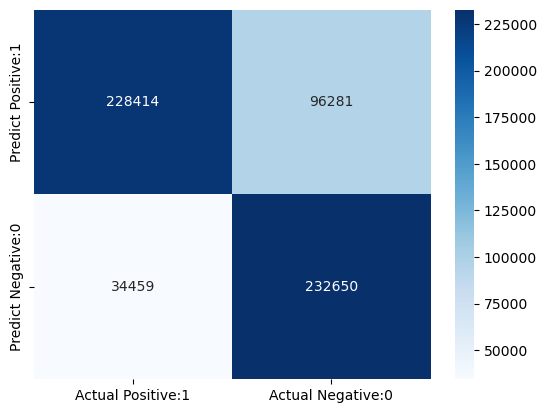

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y4_test, y_pred4)
cm_matrix4 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix4, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob4 = LR.predict_proba(X4_test) [:,1]
fpr, tpr, thresholds =roc_curve(y4_test, y_pred_prob4)

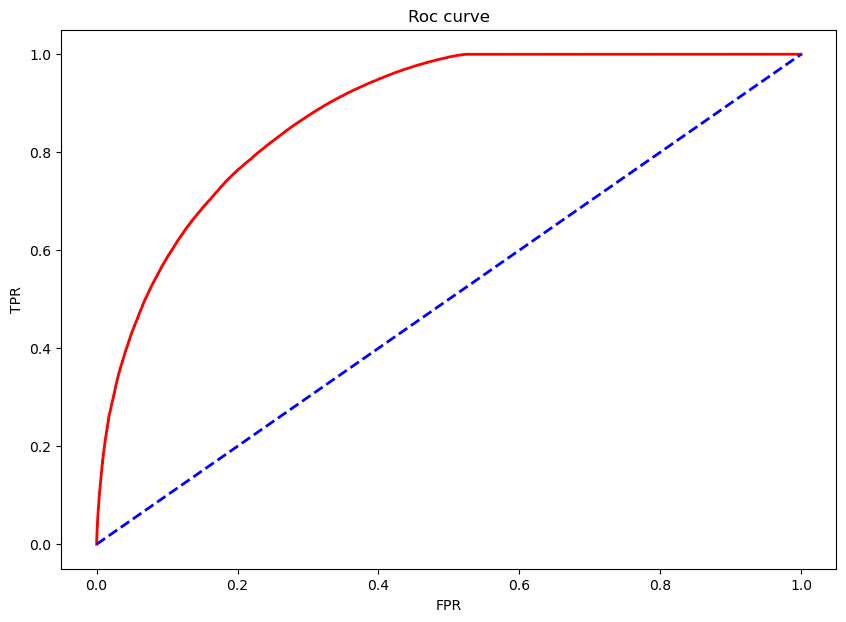

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
LR = LogisticRegression(random_state=0)
LR.fit(X4_train, y4_train)

LogisticRegression(random_state=0)

In [ ]:
# Esta es una regresión, por lo que tiene coeficientes

print('Intercept: ' + str(LR.intercept_))
print('Coefficients: ')
summary = pd.DataFrame([X4_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Intercept: [-0.03683266]
Coefficients: 


,Variable,Coefficient
0,last_fico_range_high,0.005858
4,annual_inc,-0.000006
1,last_pymnt_amnt,-0.000316
7,num_rev_accts,-0.023565
6,open_acc,-0.092342
8,purpose,-0.113039
3,emp_length,-0.145966
5,grade,-0.226263
2,collection_recovery_fee,-2.874226


#SET 5

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X5_train, y5_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred5 = LR.predict(X5_test)
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X5_train, y5_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X5_test, y5_test)))

Precisión en el set de Entrenamiento: 0.80
Precisión en el set de Test: 0.80


In [ ]:
print('F-1 Score : ',(f1_score(y5_test, y_pred5, average='micro')))
print('Precision Score : ',(precision_score(y5_test, y_pred5, average='micro')))
print('Recall Score : ',(recall_score(y5_test, y_pred5, average='micro')))
print('Jaccard Score : ',(jaccard_score(y5_test, y_pred5, average='micro')))

F-1 Score :  0.7988641509689018
Precision Score :  0.7988641509689018
Recall Score :  0.7988641509689018
Jaccard Score :  0.6650905903885138


In [ ]:
acc10=(accuracy_score(y5_test, y_pred5))
f10=(f1_score(y5_test, y_pred5, average='micro'))

In [ ]:
print (classification_report(y5_test, y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80    324754
           1       0.74      0.87      0.80    267050

    accuracy                           0.80    591804
   macro avg       0.80      0.80      0.80    591804
weighted avg       0.81      0.80      0.80    591804



<Figure size 900x900 with 0 Axes>

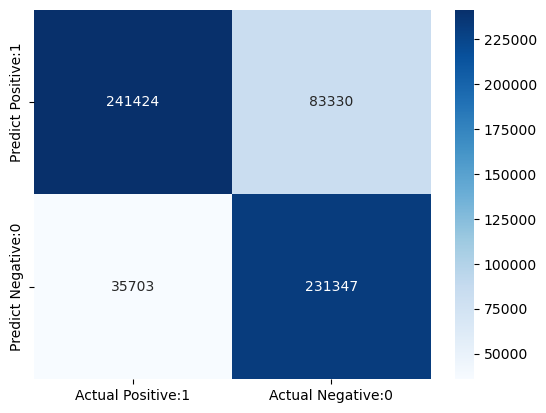

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y5_test, y_pred5)
cm_matrix5 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix5, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob5 = LR.predict_proba(X5_test) [:,1]
fpr, tpr, thresholds =roc_curve(y5_test, y_pred_prob5)

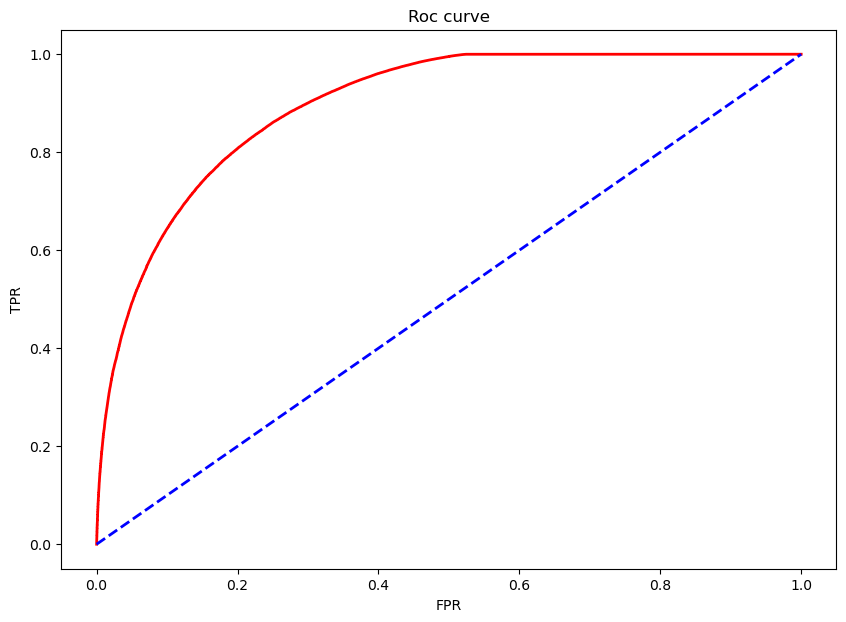

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
LR = LogisticRegression(random_state=0)
LR.fit(X5_train, y5_train)

LogisticRegression(random_state=0)

In [ ]:
# Esta es una regresión, por lo que tiene coeficientes

print('Intercept: ' + str(LR.intercept_))
print('Coefficients: ')
summary = pd.DataFrame([X5_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Intercept: [-0.10436011]
Coefficients: 


,Variable,Coefficient
0,last_fico_range_high,0.006475
4,annual_inc,-0.000008
1,last_pymnt_amnt,-0.00019
6,open_acc,-0.037483
7,num_rev_accts,-0.056646
3,emp_length,-0.064776
8,purpose,-0.147431
5,grade,-0.57021
2,collection_recovery_fee,-4.271606


In [ ]:
#Se calcula la precisión y el F1-score promedio para la ejecución de los 5 modelos con los 5 subsets de datos.
accuracy = [acc6, acc7, acc8, acc9, acc10]
acc_promedio2=np.mean(accuracy)

f= [f6, f7, f8, f9, f10]
f_prom2=np.mean(f)

print('Accuracy Promedio : ',acc_promedio2)
print('F1 Score Promedio : ',f_prom2)

Accuracy Promedio :  0.7768615960689688
F1 Score Promedio :  0.7768615960689688


In [ ]:
# Calcular la matriz promedio
matrices = [cm_matrix1, cm_matrix2, cm_matrix3, cm_matrix4, cm_matrix5]
matriz_promedio = np.mean(matrices, axis=0)


In [ ]:
#Se calcula la matriz de confusión promedio la ejecución de los 5 modelos con los 5 subsets de datos.
matriz_promedio1 = pd.DataFrame(data=matriz_promedio, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
matriz_promedio1

,Actual Positive:1,Actual Negative:0
Predict Positive:1,226205.8,98459.8
Predict Negative:0,33594.4,233544.0


# XGBOOST

#SET 1

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [ ]:
xgb.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred6 = xgb.predict(X1_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X1_train, y1_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(xgb.score(X1_test, y1_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y1_test, y_pred6, average='micro')))
print('Precision Score : ',(precision_score(y1_test, y_pred6, average='micro')))
print('Recall Score : ',(recall_score(y1_test, y_pred6, average='micro')))
print('Jaccard Score : ',(jaccard_score(y1_test, y_pred6, average='micro')))

F-1 Score :  0.9042351859737345
Precision Score :  0.9042351859737345
Recall Score :  0.9042351859737345
Jaccard Score :  0.8252091821156616


In [ ]:
acc11=(accuracy_score(y1_test, y_pred6))
f11=(f1_score(y1_test, y_pred6, average='micro'))


0.9042351859737345

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y1_test, y_pred6))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324647
           1       0.88      0.91      0.90    267157

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

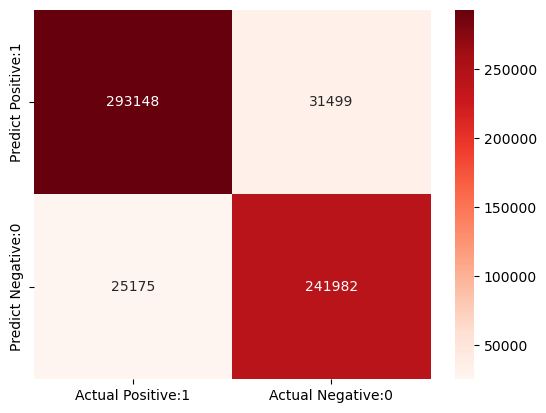

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y_pred6)
cm_matrix6 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix6, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob6 = xgb.predict_proba(X1_test) [:,1]
fpr, tpr, thresholds =roc_curve(y1_test, y_pred_prob6)

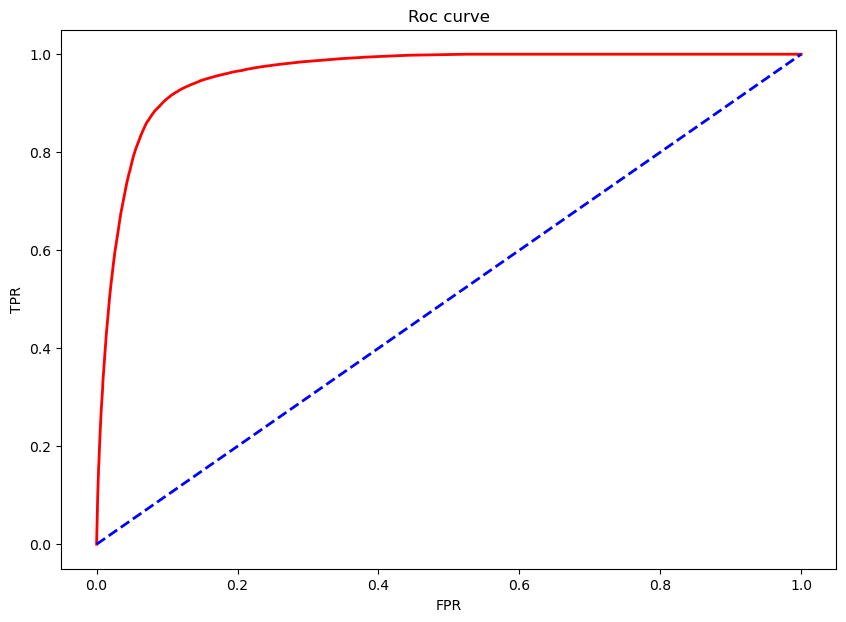

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 2

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [ ]:
xgb.fit(X2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred7 = xgb.predict(X2_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X2_train, y2_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(xgb.score(X2_test, y2_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y2_test, y_pred7, average='micro')))
print('Precision Score : ',(precision_score(y2_test, y_pred7, average='micro')))
print('Recall Score : ',(recall_score(y2_test, y_pred7, average='micro')))
print('Jaccard Score : ',(jaccard_score(y2_test, y_pred7, average='micro')))

F-1 Score :  0.9037705050996614
Precision Score :  0.9037705050996614
Recall Score :  0.9037705050996614
Jaccard Score :  0.8244354939399124


In [ ]:
acc12=(accuracy_score(y2_test, y_pred7))
f12=(f1_score(y2_test, y_pred7, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y2_test, y_pred7))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324688
           1       0.88      0.91      0.89    267116

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

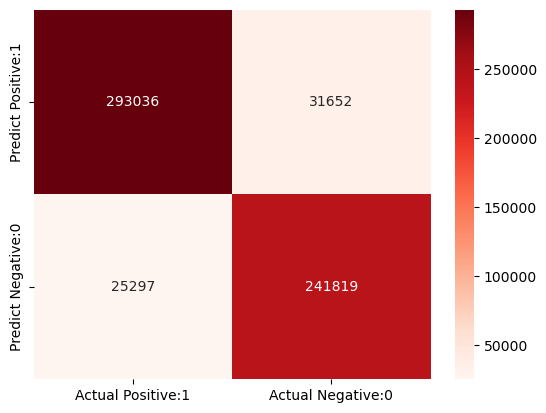

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y_pred7)
cm_matrix7 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix7, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob7 = xgb.predict_proba(X2_test) [:,1]
fpr, tpr, thresholds =roc_curve(y2_test, y_pred_prob7)

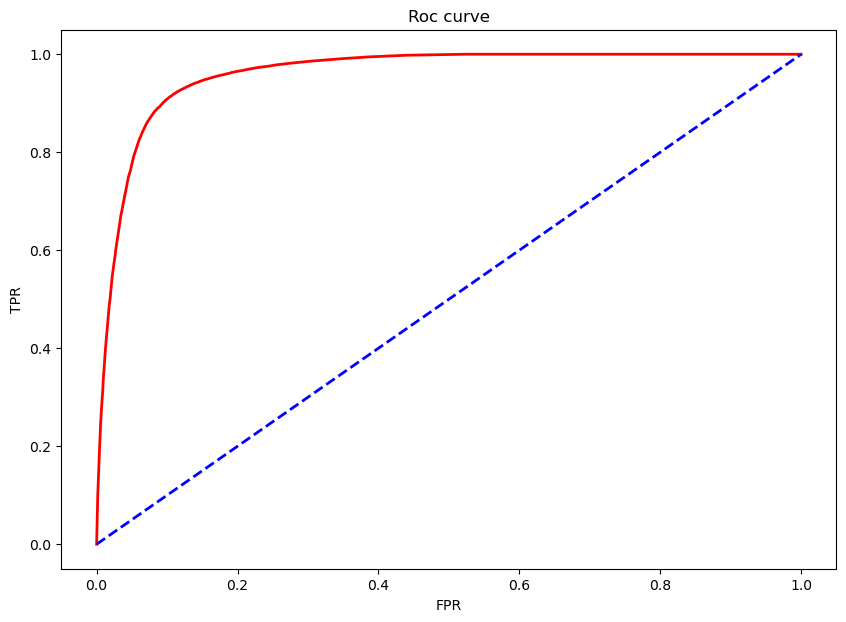

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 3

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [ ]:
xgb.fit(X3_train, y3_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred8 = xgb.predict(X3_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X3_train, y3_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(xgb.score(X3_test, y3_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y3_test, y_pred8, average='micro')))
print('Precision Score : ',(precision_score(y3_test, y_pred8, average='micro')))
print('Recall Score : ',(recall_score(y3_test, y_pred8, average='micro')))
print('Jaccard Score : ',(jaccard_score(y3_test, y_pred8, average='micro')))

F-1 Score :  0.9044835790227845
Precision Score :  0.9044835790227845
Recall Score :  0.9044835790227845
Jaccard Score :  0.8256230228077942


In [ ]:
acc13=(accuracy_score(y3_test, y_pred8))
f13=(f1_score(y3_test, y_pred8, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y3_test, y_pred8))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324544
           1       0.89      0.91      0.90    267260

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

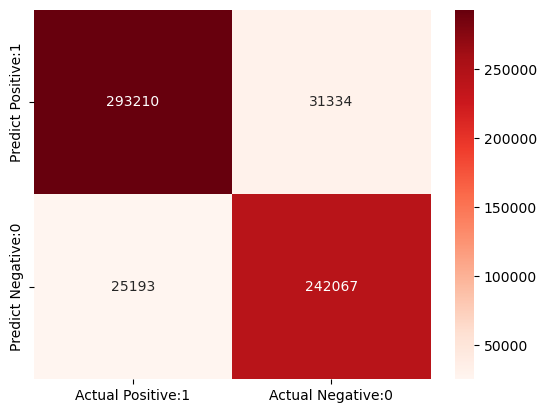

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y3_test, y_pred8)
cm_matrix8 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix8, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob8 = xgb.predict_proba(X3_test) [:,1]
fpr, tpr, thresholds =roc_curve(y3_test, y_pred_prob8)

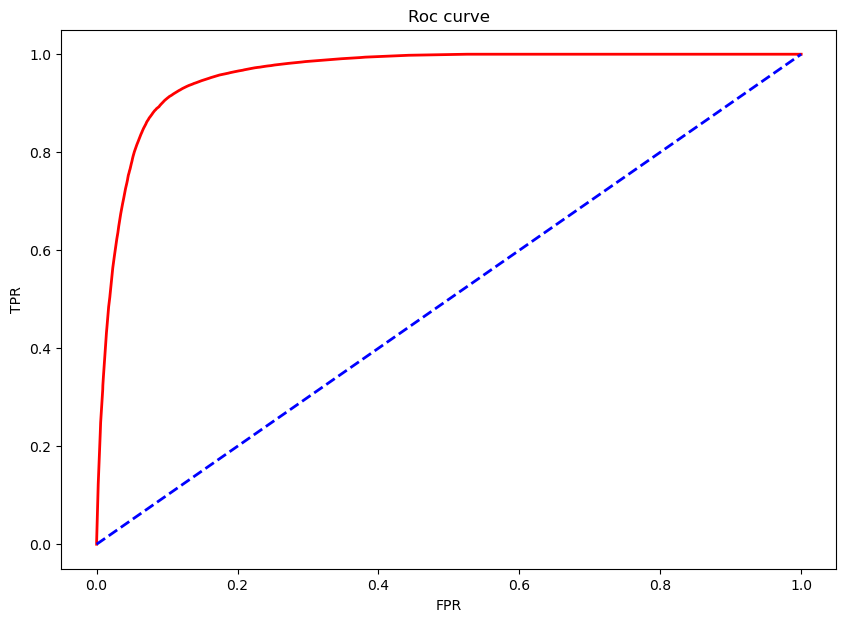

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 4

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [ ]:
xgb.fit(X4_train, y4_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred9 = xgb.predict(X4_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X4_train, y4_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(xgb.score(X4_test, y4_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y4_test, y_pred9, average='micro')))
print('Precision Score : ',(precision_score(y4_test, y_pred9, average='micro')))
print('Recall Score : ',(recall_score(y4_test, y_pred9, average='micro')))
print('Jaccard Score : ',(jaccard_score(y4_test, y_pred9, average='micro')))

F-1 Score :  0.9046441051429189
Precision Score :  0.9046441051429189
Recall Score :  0.9046441051429189
Jaccard Score :  0.8258905707180718


In [ ]:
acc14=(accuracy_score(y4_test, y_pred9))
f14=(f1_score(y4_test, y_pred9, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y4_test, y_pred9))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324695
           1       0.88      0.91      0.90    267109

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.91      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

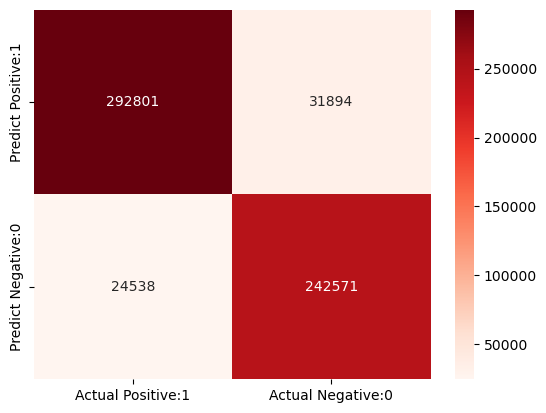

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y4_test, y_pred9)
cm_matrix9 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix9, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob9 = xgb.predict_proba(X4_test) [:,1]
fpr, tpr, thresholds =roc_curve(y4_test, y_pred_prob9)

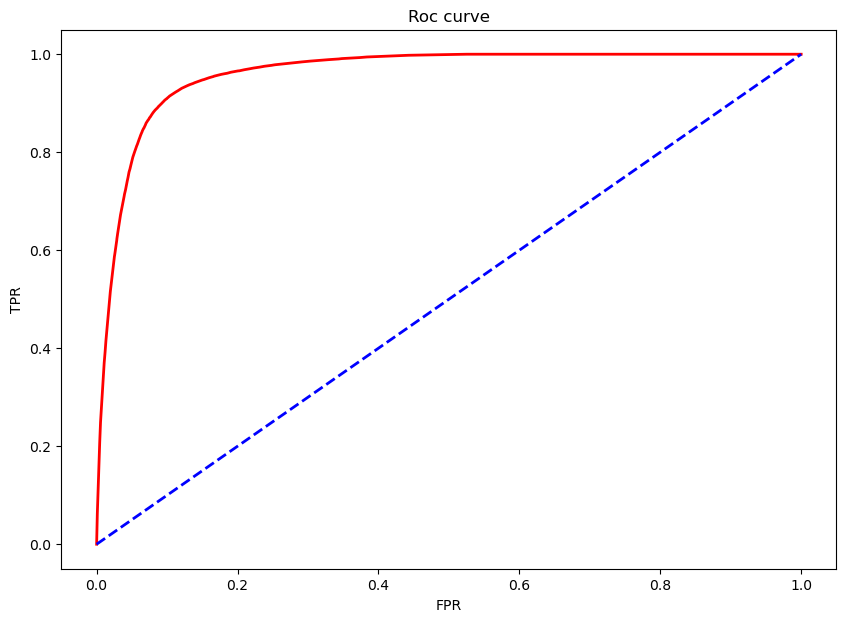

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#sET 5

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [ ]:
xgb.fit(X5_train, y5_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred10 = xgb.predict(X5_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X5_train, y5_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(xgb.score(X5_test, y5_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.90


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y5_test, y_pred10, average='micro')))
print('Precision Score : ',(precision_score(y5_test, y_pred10, average='micro')))
print('Recall Score : ',(recall_score(y5_test, y_pred10, average='micro')))
print('Jaccard Score : ',(jaccard_score(y5_test, y_pred10, average='micro')))

F-1 Score :  0.9041000060830952
Precision Score :  0.904100006083095
Recall Score :  0.904100006083095
Jaccard Score :  0.8249840415198024


In [ ]:
acc15=(accuracy_score(y5_test, y_pred10))
f15=(f1_score(y5_test, y_pred10, average='micro'))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y5_test, y_pred10))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    324754
           1       0.88      0.91      0.90    267050

    accuracy                           0.90    591804
   macro avg       0.90      0.90      0.90    591804
weighted avg       0.90      0.90      0.90    591804



<Figure size 900x900 with 0 Axes>

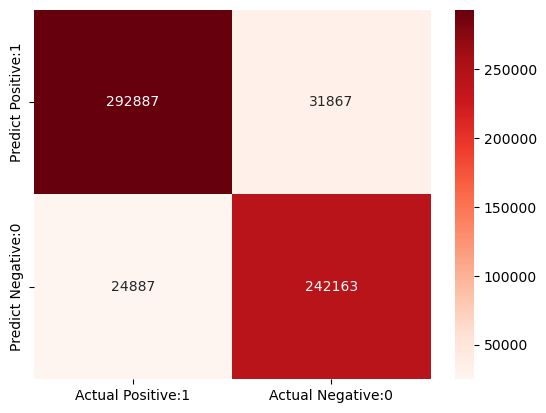

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y5_test, y_pred10)
cm_matrix10 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix10, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob10 = xgb.predict_proba(X5_test) [:,1]
fpr, tpr, thresholds =roc_curve(y5_test, y_pred_prob10)

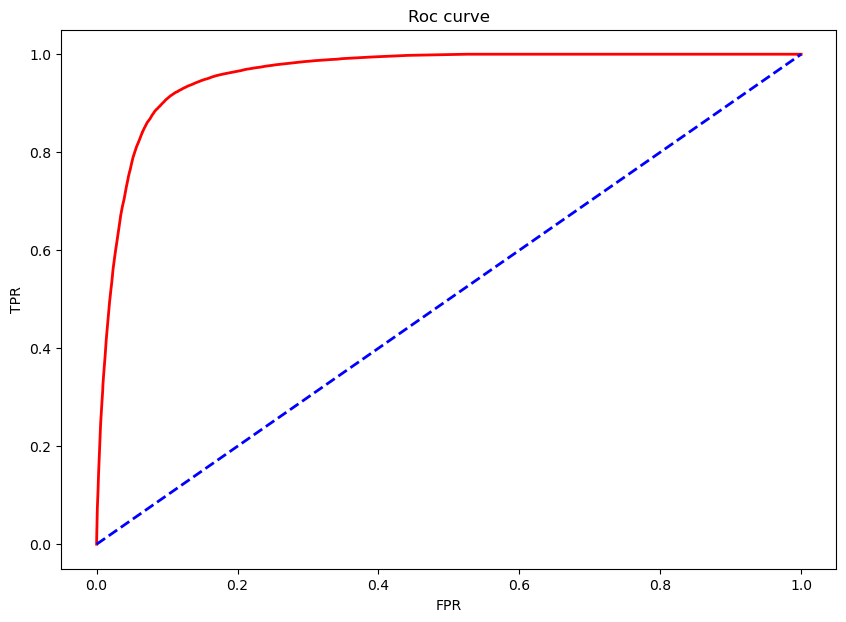

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
#Se calcula la precisión y el F1-score promedio para la ejecución de los 5 modelos con los 5 subsets de datos.
accuracy = [acc11, acc12, acc13, acc14, acc15]
acc_promedio3=np.mean(accuracy)

f= [f11, f12, f13, f14, f15]
f_prom3=np.mean(f)

print('Accuracy Promedio : ',acc_promedio3)
print('F1 Score Promedio : ',f_prom3)

Accuracy Promedio :  0.904246676264439
F1 Score Promedio :  0.904246676264439


In [ ]:
# Calcular la matriz promedio
matrices = [cm_matrix6, cm_matrix7, cm_matrix8, cm_matrix9, cm_matrix10]
matriz_promedio2 = np.mean(matrices, axis=0)

In [ ]:
#Se calcula la matriz de confusión promedio la ejecución de los 5 modelos con los 5 subsets de datos.
matriz_promedio2 = pd.DataFrame(data=matriz_promedio2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
matriz_promedio2

,Actual Positive:1,Actual Negative:0
Predict Positive:1,293016.4,31649.2
Predict Negative:0,25018.0,242120.4


## KNN

#SET 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')
#primero se elige un vecindario de 3 para despues encontrar el optimo en gráfico

In [ ]:
knn.fit(X1_train,y1_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
y_pred=knn.predict(X1_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn.score(X1_train, y1_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn.score(X1_test, y1_test)))

Precisión en el set de Entrenamiento: 0.97
Precisión en el set de Test: 0.95


In [ ]:

print('F-1 Score : ',(f1_score(y1_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y1_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y1_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y1_test, y_pred, average='micro')))

F-1 Score :  0.9502419720042447
Precision Score :  0.9502419720042447
Recall Score :  0.9502419720042447
Jaccard Score :  0.9052009574230062


In [ ]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    324647
           1       0.99      0.90      0.94    267157

    accuracy                           0.95    591804
   macro avg       0.96      0.95      0.95    591804
weighted avg       0.95      0.95      0.95    591804



<Figure size 900x900 with 0 Axes>

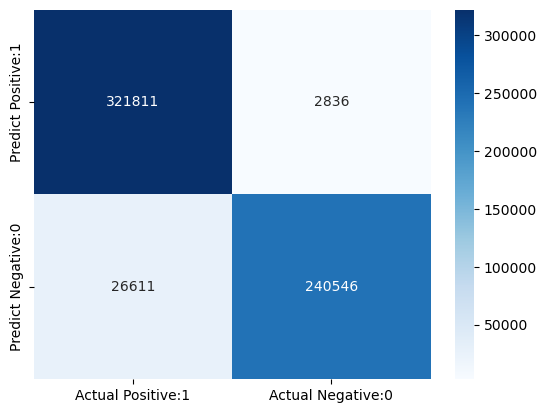

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y1_test, y_pred)
cm_matrix11 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])



sns.heatmap(cm_matrix11, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = knn.predict_proba(X1_test) [:,1]
fpr, tpr, thresholds =roc_curve(y1_test, y_pred_prob)

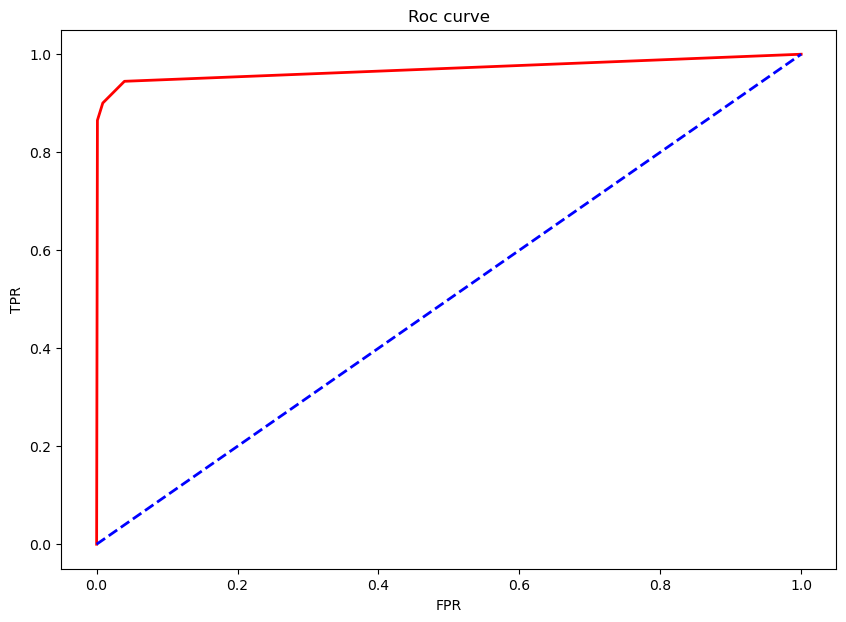

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Dados los resultados de precisión se evidencia un sobreajuste en los datos, por lo cual ya no se ejecutaron más iteraciones con los otros subsets de datos.

## NAIVE BAYES

NAIVE BAYES - ALGORITMO GAUSSIAN

#SET 1

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X1_train, y1_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X1_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X1_train, y1_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X1_test, y1_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.79


In [ ]:

print('F-1 Score : ',(f1_score(y1_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y1_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y1_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y1_test, y_pred, average='micro')))


F-1 Score :  0.7927421916715669
Precision Score :  0.7927421916715669
Recall Score :  0.7927421916715669
Jaccard Score :  0.6566469781373345


In [ ]:
acc16=(accuracy_score(y1_test, y_pred))
f16=(f1_score(y1_test, y_pred, average='micro'))

In [ ]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77    324647
           1       0.69      0.99      0.81    267157

    accuracy                           0.79    591804
   macro avg       0.84      0.81      0.79    591804
weighted avg       0.85      0.79      0.79    591804



<Figure size 900x900 with 0 Axes>

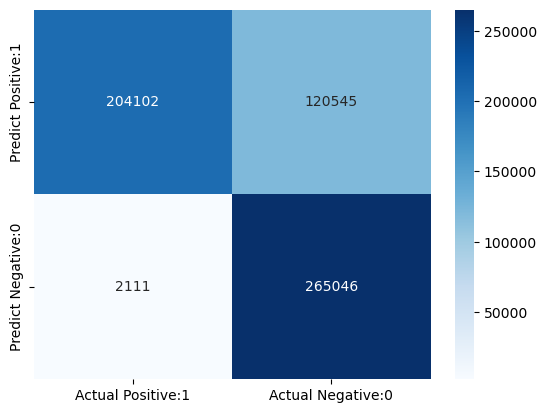

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y1_test, y_pred)
cm_matrix12 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix12, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X1_test) [:,1]
fpr, tpr, thresholds =roc_curve(y1_test, y_pred_prob)

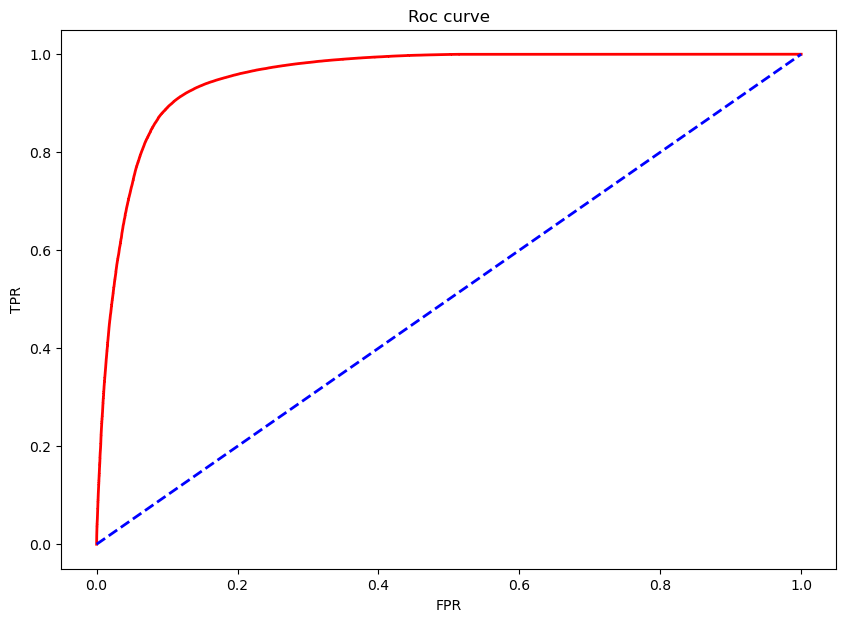

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 2

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X2_train, y2_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X2_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X2_train, y2_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X2_test, y2_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.79


In [ ]:

print('F-1 Score : ',(f1_score(y2_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y2_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y2_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y2_test, y_pred, average='micro')))


F-1 Score :  0.7931359031030544
Precision Score :  0.7931359031030544
Recall Score :  0.7931359031030544
Jaccard Score :  0.6571874208059902


In [ ]:
acc17=(accuracy_score(y2_test, y_pred))
f17=(f1_score(y2_test, y_pred, average='micro'))

In [ ]:
print (classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77    324688
           1       0.69      0.99      0.81    267116

    accuracy                           0.79    591804
   macro avg       0.84      0.81      0.79    591804
weighted avg       0.85      0.79      0.79    591804



<Figure size 900x900 with 0 Axes>

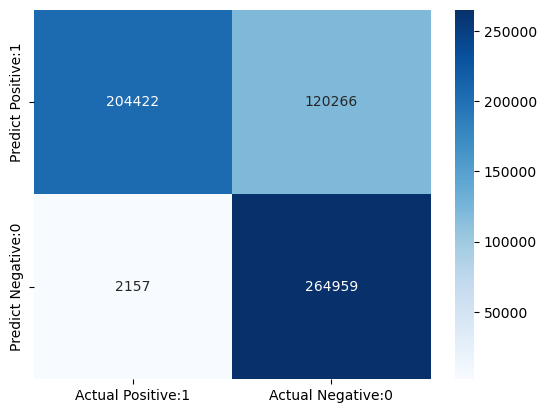

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y2_test, y_pred)
cm_matrix13 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix13, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X2_test) [:,1]
fpr, tpr, thresholds =roc_curve(y2_test, y_pred_prob)

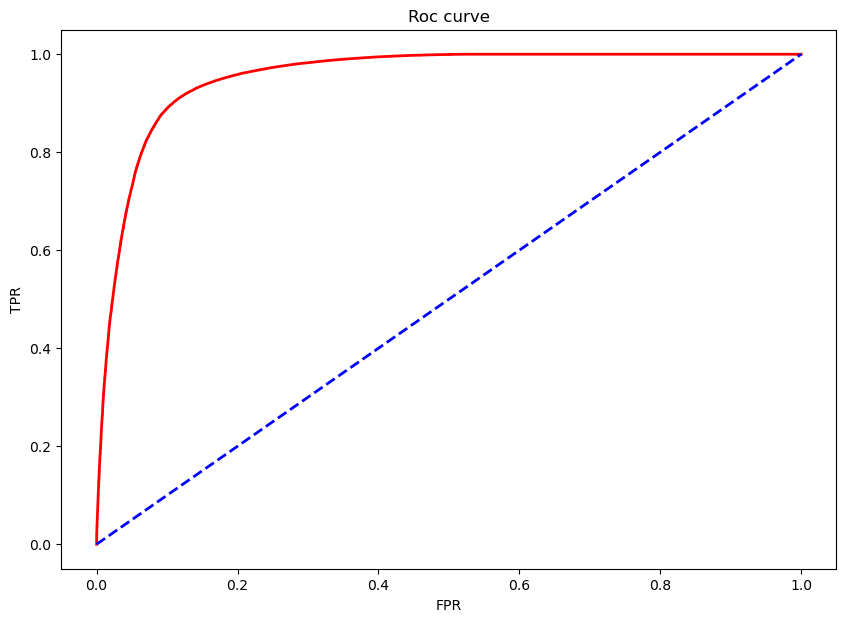

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 3

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X3_train, y3_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X3_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X3_train, y3_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X3_test, y3_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.79


In [ ]:

print('F-1 Score : ',(f1_score(y3_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y3_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y3_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y3_test, y_pred, average='micro')))


F-1 Score :  0.7920882589505985
Precision Score :  0.7920882589505985
Recall Score :  0.7920882589505985
Jaccard Score :  0.6557501115623343


In [ ]:
acc18=(accuracy_score(y3_test, y_pred))
f18=(f1_score(y3_test, y_pred, average='micro'))

In [ ]:
print (classification_report(y3_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77    324544
           1       0.69      0.99      0.81    267260

    accuracy                           0.79    591804
   macro avg       0.84      0.81      0.79    591804
weighted avg       0.85      0.79      0.79    591804



<Figure size 900x900 with 0 Axes>

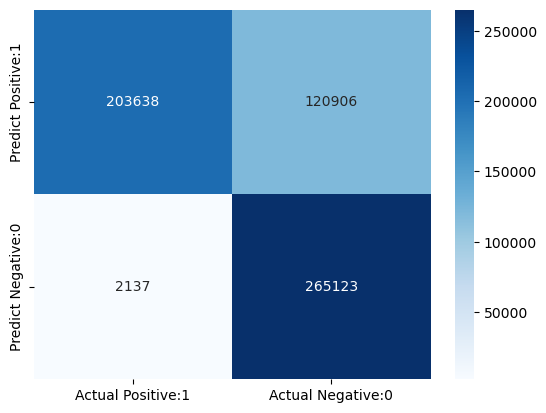

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y3_test, y_pred)
cm_matrix14 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix14, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X3_test) [:,1]
fpr, tpr, thresholds =roc_curve(y3_test, y_pred_prob)

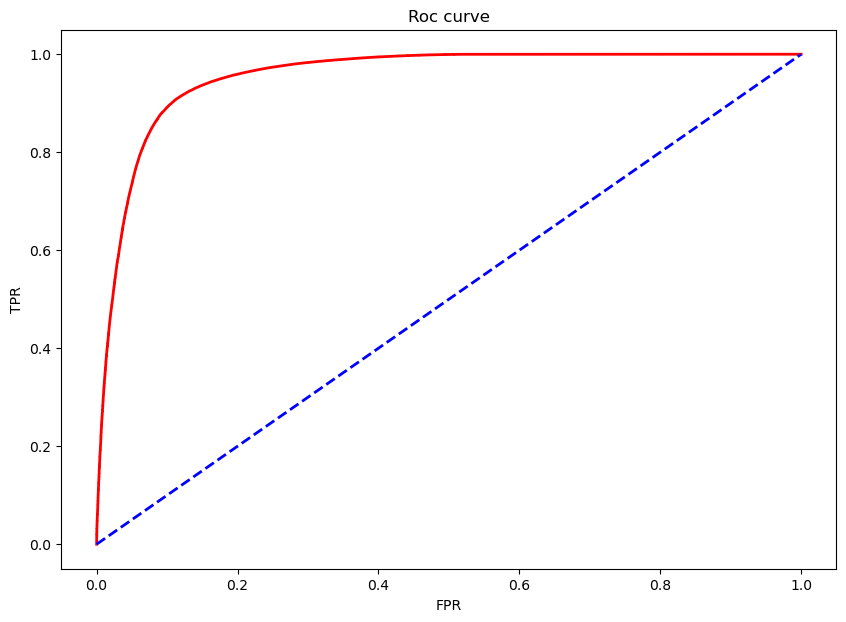

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 4

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X4_train, y4_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X4_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X4_train, y4_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X4_test, y4_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.79


In [ ]:

print('F-1 Score : ',(f1_score(y4_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y4_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y4_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y4_test, y_pred, average='micro')))


F-1 Score :  0.7923113057701537
Precision Score :  0.7923113057701536
Recall Score :  0.7923113057701536
Jaccard Score :  0.6560559103978509


In [ ]:
acc19=(accuracy_score(y4_test, y_pred))
f19=(f1_score(y4_test, y_pred, average='micro'))

In [ ]:
print (classification_report(y4_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77    324695
           1       0.69      0.99      0.81    267109

    accuracy                           0.79    591804
   macro avg       0.84      0.81      0.79    591804
weighted avg       0.85      0.79      0.79    591804



<Figure size 900x900 with 0 Axes>

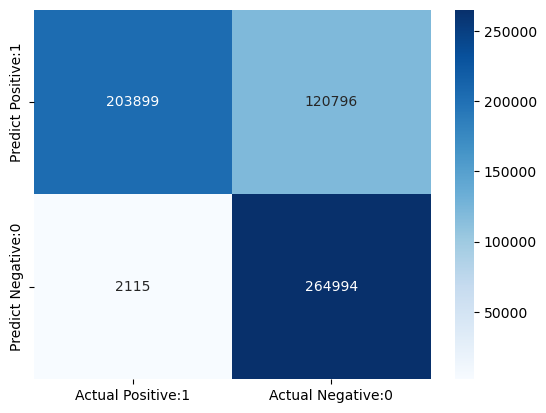

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y4_test, y_pred)
cm_matrix15 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix15, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X4_test) [:,1]
fpr, tpr, thresholds =roc_curve(y4_test, y_pred_prob)

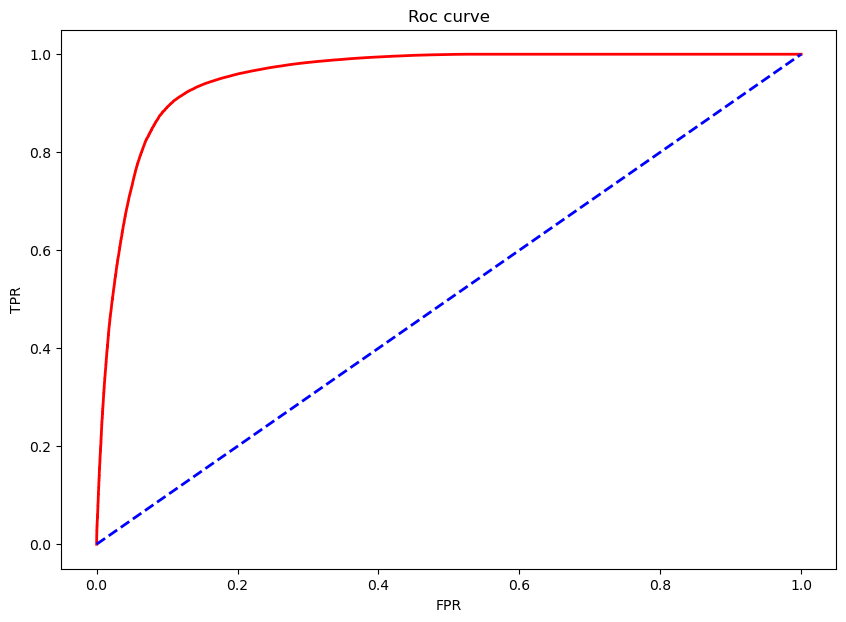

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 5

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X5_train, y5_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X5_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X5_train, y5_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X5_test, y5_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.79


In [ ]:

print('F-1 Score : ',(f1_score(y5_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y5_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y5_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y5_test, y_pred, average='micro')))

F-1 Score :  0.7922977877810897
Precision Score :  0.7922977877810897
Recall Score :  0.7922977877810897
Jaccard Score :  0.6560373739196864


In [ ]:
acc20=(accuracy_score(y5_test, y_pred))
f20=(f1_score(y5_test, y_pred, average='micro'))

In [ ]:
print (classification_report(y5_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77    324754
           1       0.69      0.99      0.81    267050

    accuracy                           0.79    591804
   macro avg       0.84      0.81      0.79    591804
weighted avg       0.85      0.79      0.79    591804



<Figure size 900x900 with 0 Axes>

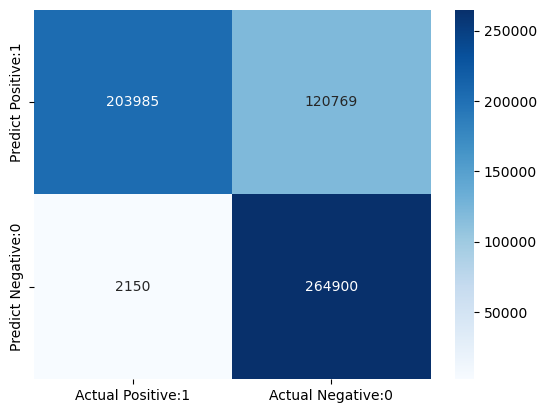

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y5_test, y_pred)
cm_matrix16 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix16, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X5_test) [:,1]
fpr, tpr, thresholds =roc_curve(y5_test, y_pred_prob)

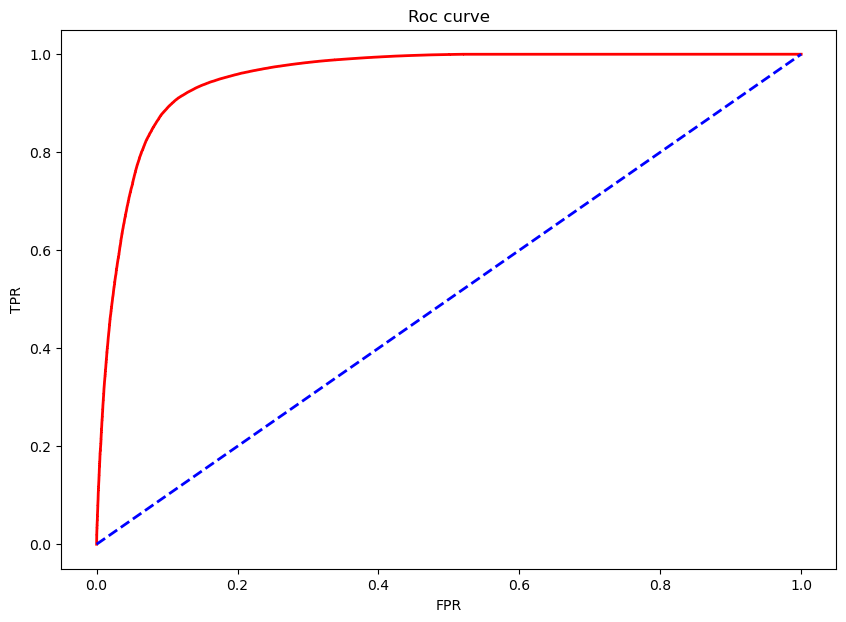

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
#Se calcula la precisión y el F1-score promedio para la ejecución de los 5 modelos con los 5
accuracy = [acc16, acc17, acc18, acc19, acc20]
acc_promedio4=np.mean(accuracy)

f= [f16, f17, f18, f19, f20]
f_prom4=np.mean(f)

print('Accuracy Promedio : ',acc_promedio4)
print('F1 Score Promedio : ',f_prom4)

Accuracy Promedio :  0.7925150894552926
F1 Score Promedio :  0.7925150894552926


In [ ]:
# Calcular la matriz promedio
matrices = [cm_matrix12, cm_matrix13, cm_matrix14, cm_matrix15, cm_matrix16]
matriz_promedio3 = np.mean(matrices, axis=0)

In [ ]:
#Se calcula la matriz de confusión promedio la ejecución de los 5 modelos con los 5 subsets de datos.
matriz_promedio3 = pd.DataFrame(data=matriz_promedio3, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
matriz_promedio3

,Actual Positive:1,Actual Negative:0
Predict Positive:1,204009.2,120656.4
Predict Negative:0,2134.0,265004.4


NAIVE BAYES -ALGORITMO MULTINOMIAL


#SET 1

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
Mult = MultinomialNB()
Mult.fit(X1_train, y1_train)
y_pred = Mult.predict(X1_test)

In [ ]:

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Mult.score(X1_train, y1_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Mult.score(X1_test, y1_test)))

Precisión en el set de Entrenamiento: 0.71
Precisión en el set de Test: 0.71


In [ ]:

print('F-1 Score : ',(f1_score(y1_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y1_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y1_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y1_test, y_pred, average='micro')))

F-1 Score :  0.7102959763705551
Precision Score :  0.7102959763705551
Recall Score :  0.7102959763705551
Jaccard Score :  0.5507433979865104


In [ ]:
acc21=(accuracy_score(y1_test, y_pred))
f21=(f1_score(y1_test, y_pred, average='micro'))

In [ ]:

print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    324647
           1       0.61      1.00      0.76    267157

    accuracy                           0.71    591804
   macro avg       0.80      0.74      0.70    591804
weighted avg       0.82      0.71      0.69    591804



<Figure size 900x900 with 0 Axes>

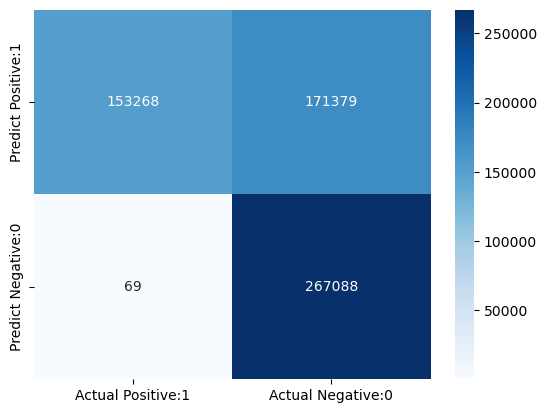

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y1_test, y_pred)
cm_matrix17 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix17, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = Mult.predict_proba(X1_test) [:,1]
fpr, tpr, thresholds =roc_curve(y1_test, y_pred_prob)

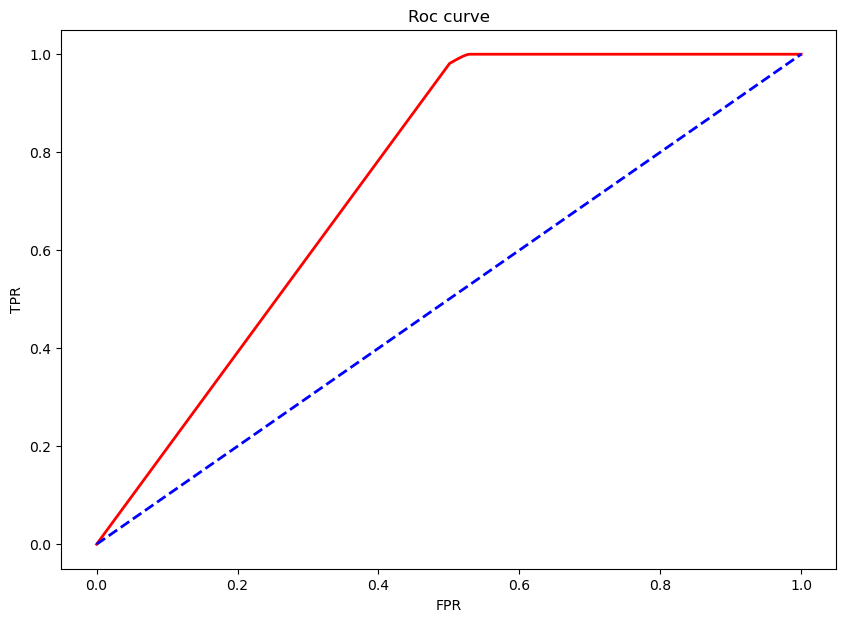

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 2

In [ ]:
Mult = MultinomialNB()
Mult.fit(X2_train, y2_train)
y_pred = Mult.predict(X2_test)

In [ ]:

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Mult.score(X2_train, y2_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Mult.score(X2_test, y2_test)))

Precisión en el set de Entrenamiento: 0.71
Precisión en el set de Test: 0.71


In [ ]:
print('F-1 Score : ',(f1_score(y2_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y2_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y2_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y2_test, y_pred, average='micro')))

F-1 Score :  0.710591682381329
Precision Score :  0.710591682381329
Recall Score :  0.710591682381329
Jaccard Score :  0.551099037187597


In [ ]:
acc22=(accuracy_score(y2_test, y_pred))
f22=(f1_score(y2_test, y_pred, average='micro'))

In [ ]:

print (classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    324688
           1       0.61      1.00      0.76    267116

    accuracy                           0.71    591804
   macro avg       0.80      0.74      0.70    591804
weighted avg       0.82      0.71      0.69    591804



<Figure size 900x900 with 0 Axes>

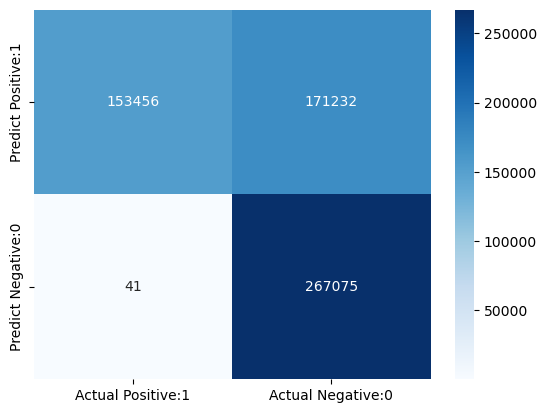

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y2_test, y_pred)
cm_matrix18 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix18, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = Mult.predict_proba(X2_test) [:,1]
fpr, tpr, thresholds =roc_curve(y2_test, y_pred_prob)

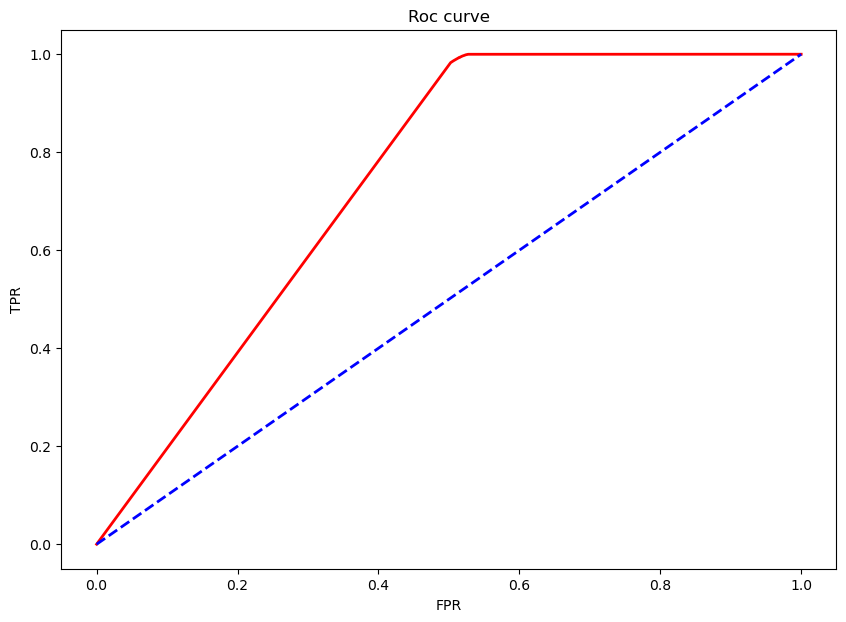

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 3

In [ ]:
Mult = MultinomialNB()
Mult.fit(X3_train, y3_train)
y_pred = Mult.predict(X3_test)

In [ ]:

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Mult.score(X3_train, y3_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Mult.score(X3_test, y3_test)))

Precisión en el set de Entrenamiento: 0.71
Precisión en el set de Test: 0.71


In [ ]:
print('F-1 Score : ',(f1_score(y3_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y3_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y3_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y3_test, y_pred, average='micro')))

F-1 Score :  0.710057721813303
Precision Score :  0.7100577218133031
Recall Score :  0.7100577218133031
Jaccard Score :  0.5504569730138998


In [ ]:
acc23=(accuracy_score(y3_test, y_pred))
f23=(f1_score(y3_test, y_pred, average='micro'))

In [ ]:

print (classification_report(y3_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    324544
           1       0.61      1.00      0.76    267260

    accuracy                           0.71    591804
   macro avg       0.80      0.74      0.70    591804
weighted avg       0.82      0.71      0.69    591804



<Figure size 900x900 with 0 Axes>

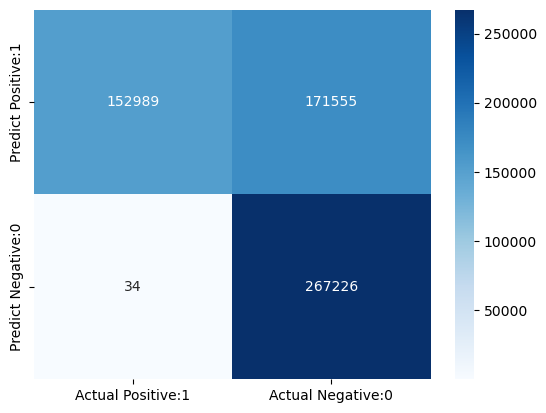

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y3_test, y_pred)
cm_matrix19 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix19, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = Mult.predict_proba(X3_test) [:,1]
fpr, tpr, thresholds =roc_curve(y3_test, y_pred_prob)

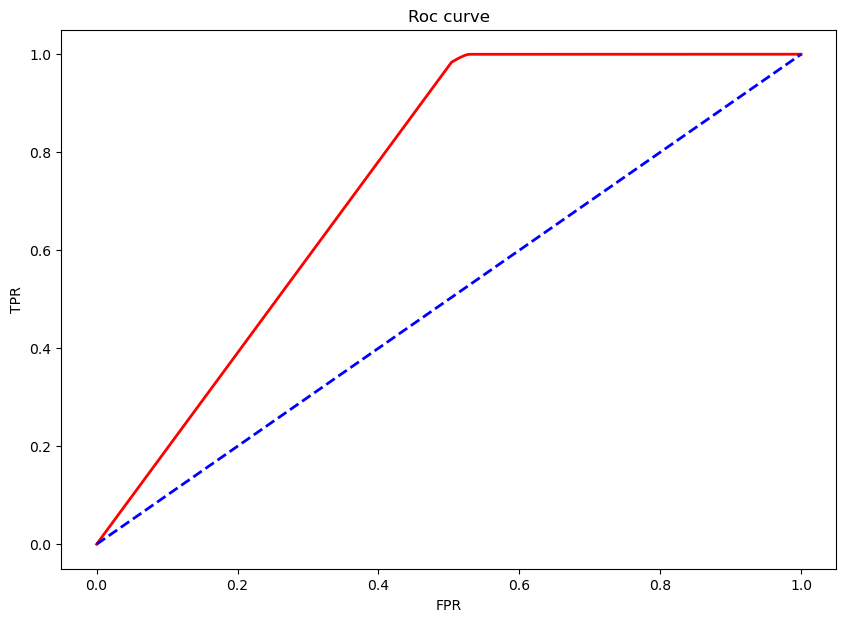

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 4

In [ ]:
Mult = MultinomialNB()
Mult.fit(X4_train, y4_train)
y_pred = Mult.predict(X4_test)

In [ ]:

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Mult.score(X4_train, y4_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Mult.score(X4_test, y4_test)))

Precisión en el set de Entrenamiento: 0.71
Precisión en el set de Test: 0.71


In [ ]:
print('F-1 Score : ',(f1_score(y4_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y4_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y4_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y4_test, y_pred, average='micro')))

F-1 Score :  0.7101117937695588
Precision Score :  0.7101117937695588
Recall Score :  0.7101117937695588
Jaccard Score :  0.5505219679810732


In [ ]:
acc24=(accuracy_score(y4_test, y_pred))
f24=(f1_score(y4_test, y_pred, average='micro'))

In [ ]:

print (classification_report(y4_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    324695
           1       0.61      1.00      0.76    267109

    accuracy                           0.71    591804
   macro avg       0.80      0.74      0.70    591804
weighted avg       0.82      0.71      0.69    591804



<Figure size 900x900 with 0 Axes>

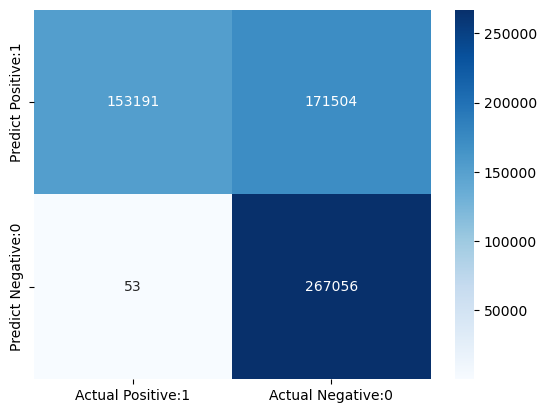

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y4_test, y_pred)
cm_matrix20 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix20, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = Mult.predict_proba(X4_test) [:,1]
fpr, tpr, thresholds =roc_curve(y4_test, y_pred_prob)

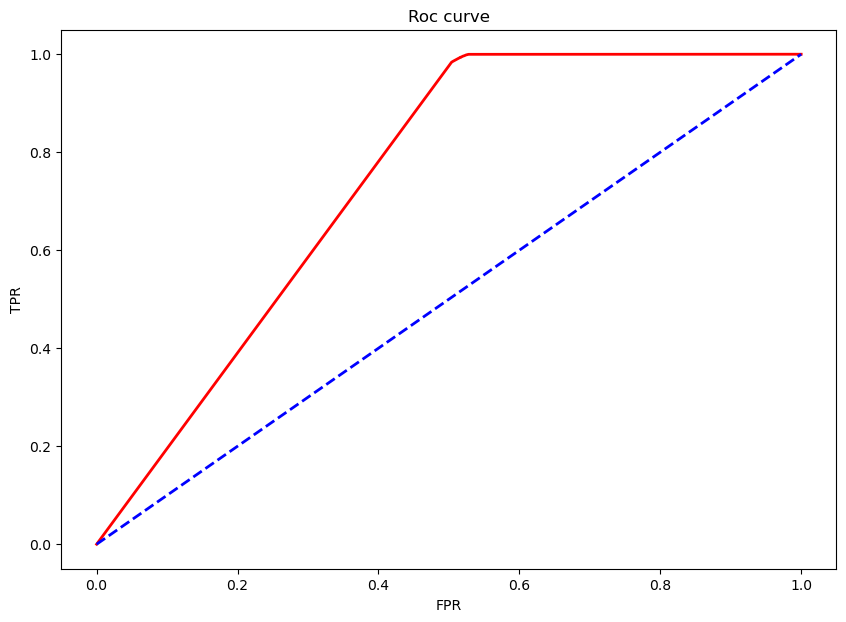

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#SET 5

In [ ]:
Mult = MultinomialNB()
Mult.fit(X5_train, y5_train)
y_pred = Mult.predict(X5_test)

In [ ]:

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Mult.score(X5_train, y5_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Mult.score(X5_test, y5_test)))

Precisión en el set de Entrenamiento: 0.71
Precisión en el set de Test: 0.71


In [ ]:
print('F-1 Score : ',(f1_score(y5_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y5_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y5_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y5_test, y_pred, average='micro')))

F-1 Score :  0.7102131786875384
Precision Score :  0.7102131786875384
Recall Score :  0.7102131786875384
Jaccard Score :  0.5506438482328727


In [ ]:
acc25=(accuracy_score(y5_test, y_pred))
f25=(f1_score(y5_test, y_pred, average='micro'))

In [ ]:
print (classification_report(y5_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    324754
           1       0.61      1.00      0.76    267050

    accuracy                           0.71    591804
   macro avg       0.80      0.74      0.70    591804
weighted avg       0.82      0.71      0.69    591804



<Figure size 900x900 with 0 Axes>

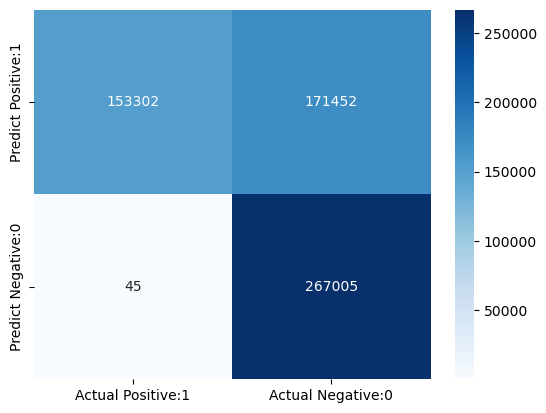

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y5_test, y_pred)
cm_matrix21 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix21, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
# sacar las probabilidades
y_pred_prob = Mult.predict_proba(X5_test) [:,1]
fpr, tpr, thresholds =roc_curve(y5_test, y_pred_prob)

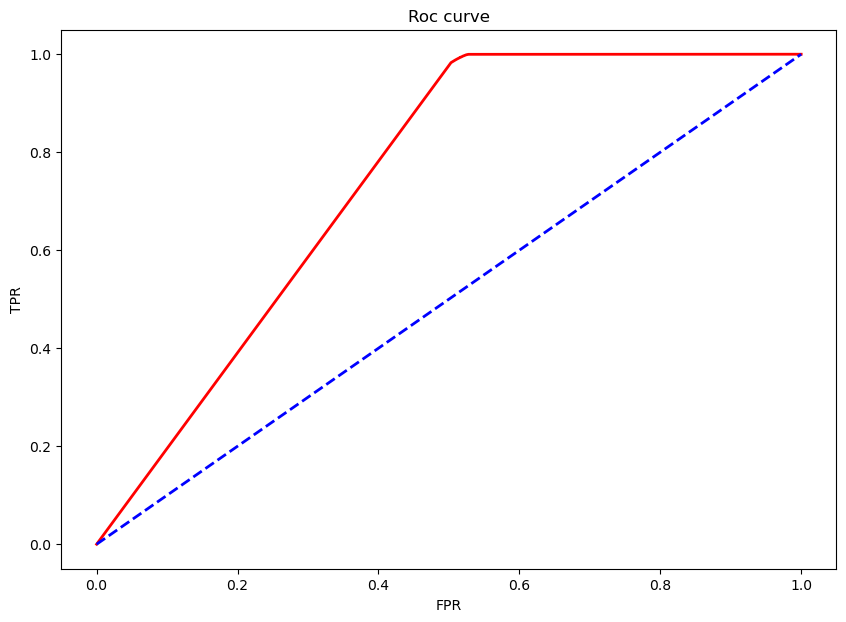

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
#Se calcula la precisión y el F1-score promedio para la ejecución de los 5 modelos con los 5 subsets de datos.
accuracy = [acc21, acc22, acc23, acc24, acc25]
acc_promedio5=np.mean(accuracy)

f= [f21, f22, f23, f24, f25]
f_prom5=np.mean(f)

print('Accuracy Promedio : ',acc_promedio5)
print('F1 Score Promedio : ',f_prom5)

Accuracy Promedio :  0.7102540706044569
F1 Score Promedio :  0.7102540706044569


In [ ]:
# Calcular la matriz promedio
matrices = [cm_matrix17, cm_matrix18, cm_matrix19, cm_matrix20, cm_matrix21]
matriz_promedio4 = np.mean(matrices, axis=0)

In [ ]:
#Se calcula la matriz de confusión promedio la ejecución de los 5 modelos con los 5 subsets de datos.
matriz_promedio4 = pd.DataFrame(data=matriz_promedio4, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
matriz_promedio4

,Actual Positive:1,Actual Negative:0
Predict Positive:1,153241.2,171424.4
Predict Negative:0,48.4,267090.0


# Resumen de los resultados

In [ ]:
#se obtiene un df resumen con las matrices de confusión promedio de todos los modelos.
matrices= np.hstack((matriz_promedio1, matriz_promedio2,matriz_promedio3,matriz_promedio4,matriz_promedio5))
matrices = pd.DataFrame(data=matrices, columns=['Actual Positive:1', 'Actual Negative:0','Actual Positive:1', 'Actual Negative:0','Actual Positive:1',
                                                'Actual Negative:0','Actual Positive:1', 'Actual Negative:0','Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])
matrices

,Actual Positive:1,Actual Negative:0,Actual Positive:1,Actual Negative:0,Actual Positive:1,Actual Negative:0,Actual Positive:1,Actual Negative:0,Actual Positive:1,Actual Negative:0
Predict Positive:1,226205.8,98459.8,293016.4,31649.2,204009.2,120656.4,153241.2,171424.4,292978.4,31687.2
Predict Negative:0,33594.4,233544.0,25018.0,242120.4,2134.0,265004.4,48.4,267090.0,26959.4,240179.0


In [ ]:
#Se obtiene una tabla resumen de las precisiones y f1-score promedios de los modelos.
data = {
    'Modelo': ['Decision Tree', 'Reg Logística', 'XGBoost','Naive Bayes-Gaussian', 'Naive Bayes-Multinomial'],
    'Accuracy': [acc_promedio1, acc_promedio2, acc_promedio3,acc_promedio4,acc_promedio5],
    'F1 Score': [f_prom1, f_prom2, f_prom3,f_prom4,f_prom5]
}


promedios = pd.DataFrame(data)

promedios


,Modelo,Accuracy,F1 Score
0,Decision Tree,0.900902,0.900902
1,Reg Logística,0.776862,0.776862
2,XGBoost,0.904247,0.904247
3,Naive Bayes-Gaussian,0.792515,0.792515
4,Naive Bayes-Multinomial,0.710254,0.710254


Conclusiones

En el marco de este proyecto, se implementó la metodología de IBM en ciencia de datos para abordar el desafío de LendingClub con el objetivo de evaluar y determinar el riesgo crediticio de los prestatarios. La metodología de IBM proporcionó un marco estructurado que guió todas las fases del proyecto, desde la comprensión inicial de los datos hasta la implementación de modelos de clasificación avanzados.

La primera etapa del proyecto consistió en una exhaustiva exploración y comprensión de los datos disponibles. Se aplicaron técnicas de preprocesamiento para limpiar, organizar los datos y poder determinar las variables más significativas que describen el fenómeno, garantizando así la calidad y la coherencia necesarias para el análisis subsiguiente.

La fase de modelado fue un componente clave del proyecto, en la cual se probaron y compararon varios modelos de clasificación. La utilización de algoritmos de aprendizaje automático permitió evaluar la calidad de los datos y descubrir patrones relevantes para la toma de decisiones.

El análisis de los resultados reveló que el modelo de XGBoost destacó como la opción más eficiente para la clasificación de los datos y determinar el riesgo crediticio con un F1-Score y precisión de 90.4. En segundo lugar destacó Decision Tree con un F1-Score y precisión de 90. Destacar que ambos modelos mostraron ser estables en los resultados de precisión obtenidos al haber implementado la validación cruzada. Adicionalmente se vió que las matrices de confusión promedio mostraban resultados balanceados tanto en falsos negativos como en falsos positivos.
Por otro lado los modelos menos eficientes mostraron ser Naive Bayes y Reg Logística con F1-Scores promedio de alrededor de 70 y Random Forest y KNN que mostraron sobreajuste en los datos.

Con los resultados obtenidos la siguiente fase sería el deployment, la cual implicaría la integración del modelo de XGBoost en el entorno operativo de la organización, lo que posibilitará la aplicación práctica de las predicciones generadas.

Se deberá establecer un sistema de recolección de feedback continuo que permitirá evaluar el rendimiento del modelo en condiciones del mundo real. Este proceso de retroalimentación será esencial para identificar posibles desafíos, cambios en los datos o necesidades emergentes, asegurando así que el modelo siga siendo relevante y preciso a lo largo del tiempo.
